Problem statement:

Situation: Energy is produced in different forms and consumed by the regions in different rates.   

Complication: Energy prices are increasing due to many reasons including but not limited to war, logistics and sanctions.   

Question: Is it possible to see what types of energy have been historically produced and consumed by the different regions? Is it possible to predict how the productions and consumption will look like in the future?   

Answer: ???


# Beskrivande analys av data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style='darkgrid', palette='crest')


In [2]:
leveranser_flytande = pd.read_table('../data/to-use/leveranser-flytande-bransle-region-ar.csv', sep=',')
elproduction_bransleanvandning = pd.read_table('../data/to-use/elproduction-bransleanvandning-region-produktionssatt-bransletyp-ar.csv', sep=',')
fjarrvarmeproduktion = pd.read_table('../data/to-use/fjarrvarmeproduktion-region-produktionssatt-bransletyp-ar.csv', sep=',')
slutanvandning = pd.read_table('../data/to-use/slutanvandning-region-forbrukarkategori-bransletyp-kategori-energityp-ar.csv', sep=',')
bransleforbrukning = pd.read_table('../data/to-use/branslefarbrukning-far-produktion-per-ar.csv', sep=',')
energidata = pd.read_table('../data/to-use/energidata-per-ar.csv', sep=',')


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2365063694.py:4: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  slutanvandning = pd.read_table('../data/to-use/slutanvandning-region-forbrukarkategori-bransletyp-kategori-energityp-ar.csv', sep=',')


## Datasets
### leveranser_flytande 
> Leveranser av bränsle, kubikmeter efter region, bränsletyp, färbrukarkategori och är   

The dataset contains information about the liquid combustible consumption in the regions, yearly. It also has some information about the types of locals that are using some of these cumbustibles, but that information is not going to be utilised in this analysis.

Datauppsättningen innehåller årligen information om förbrukningen av flytande brännbart i regionerna. Den har också en del information om vilka typer av lokalbefolkning som använder en del av dessa cumbusibles, men den informationen kommer inte att användas i denna analys


### elproduction_bransleanvandning 
> Elproduktion och bränsleanvändning (MWh) efter region, produktionssätt, bränsletyp och är   

The dataset contains information about the amount of energy consumed by type of energy and way of production.

Datauppsättningen innehåller information om mängden energi som förbrukas efter energislag och produktionssätt.

### fjarrvarmeproduktion 
> Fjärrvärmeproduktion och bränsleanvändning (MWh) efter region, produktionssätt, bränsletyp och är

The dataset contains information about the amount of district energy consumed by type of energy and way of production.

Datauppsättningen innehåller information om mängden fjarrvarme som förbrukas efter energislag och produktionssätt.

### slutanvandning 
> Slutanvändning (MWh) efter region, förbrukarkategori, bränsletyp och är

The dataset contains information about the amount of energy consumed by type of energy and way of production at the consumption point, per type of consumption point for every region, yearly.

Datauppsättningen innehåller information om mängden energi som förbrukas per typ av energi och produktionssätt vid förbrukningspunkten, per typ av förbrukningspunkt för varje region, årligen.

### bransleforbukning 
> Bränslefärbrukning fär produktion av ånga och hetvatten, TJ efter produktionsslag, bränsletyp och är

The dataset contains information about the amount of energy consumed by type of energy and way of production yearly.

Datauppsättningen innehåller information om mängden energi som förbrukas efter energislag och produktionssätt årligen.

### energidata 
> Energidata (MWh) efter region, kategori, energityp och år

The dataset contains information about the amount of energy consumed by type of energy and type of production, per region yearly.

Datauppsättningen innehåller information om mängden energi som förbrukas per typ av energi och typ av produktion, per region och år.

In [3]:
datasets = [leveranser_flytande, elproduction_bransleanvandning, 
            fjarrvarmeproduktion, slutanvandning, bransleforbrukning, energidata]

variables = ['region', 'bransletyp', 'ar', 'm3', 'farbrukarkategori', 'produktionssatt',
             'MWh', 'kategori', 'energityp', 'produktionsslag', 'bransleforbukning']



En av de första sakerna som behöver göras är att ta itu med NA:s värderingar. I det här fallet använde vi olika typer av imputering

- leveranser_flytande,m3: fillna (fffill)
- fjarrvarmeproduktion: interpolate
- slutanvandning: Not used since nore than one columns have NAs that are categorical - dabading using this dataframe at all; considering it needs reworking in the merging phase.
- energidata.MWh: fillna (fffill)

In [4]:
for d in datasets:
    name = [x for x in globals() if globals()[x] is d][0]
    print('Dataframe: ', name)
    
    contains_nulls = d.isna().sum()
    print('Number of Nuls: ', contains_nulls, 'out of', len(d))
    # print(d.describe(include='object'))

    # if 'region' in d.columns:
    #     print('lkfbohndsvåon')
    #     d = d[d.region.isin(
    #         ['0160 T�by', '0117 �ster�ker', '0180 Stockholm', '0980 Gotland', '01 Stockholms l�n', '22 V�sternorrlands l�n', '09 Gotlands l�n', '00 Riket', '2581 Pite�', '1480 G�teborg'
    #         ])].reset_index(drop=True)
    #     print(d.region.drop_duplicates(keep='first').reset_index(drop=True))




Dataframe:  leveranser_flytande
Number of Nuls:  region                      0
bransletyp                  0
ar                          0
m3                     139680
forbrukarkategori       74494
fornybar_bransletyp         0
dtype: int64 out of 353854
Dataframe:  elproduction_bransleanvandning
Number of Nuls:  region                      0
produktionssatt             0
bransletyp                  0
ar                          0
MWh                         0
fornybar_bransletyp         0
fornybar_produktionssatt    0
dtype: int64 out of 194832
Dataframe:  fjarrvarmeproduktion
Number of Nuls:  region                           0
produktionssatt                  0
bransletyp                       0
ar                               0
MWh                         419328
fornybar_bransletyp              0
fornybar_produktionssatt         0
dtype: int64 out of 917532
Dataframe:  slutanvandning
Number of Nuls:  region                      0
forbrukarkategori      159390
bransletyp           

In [5]:
leveranser_flytande.m3 = leveranser_flytande.m3.fillna(method='ffill'); print('leveranser_flytande: Number of Nuls: ', leveranser_flytande.isna().sum().sum(), 'out of', len(leveranser_flytande))
fjarrvarmeproduktion.MWh = fjarrvarmeproduktion.MWh.interpolate(); print('fjarrvarmeproduktion: Number of Nuls: ', fjarrvarmeproduktion.isna().sum().sum(), 'out of', len(fjarrvarmeproduktion))
# slutanvandning = slutanvandning.fillna('fffill'); print('slutanvandning: Number of Nuls: ', slutanvandning.isna().sum().sum(), 'out of', len(slutanvandning))
energidata.MWh = energidata.MWh.fillna(method='ffill'); print('energidata: Number of Nuls: ', energidata.isna().sum().sum(), 'out of', len(energidata))


leveranser_flytande: Number of Nuls:  74494 out of 353854
fjarrvarmeproduktion: Number of Nuls:  0 out of 917532
energidata: Number of Nuls:  0 out of 4941090


The regions in the datasets are 312, which is too many to analyze at the same time so a selection was made, the following ones were chosen:
Regionerna i datamängderna är 312, vilket är för många för att analysera samtidigt så ett urval gjordes, följande valdes:
- 0160 T�by
- 0117 �ster�ker
- 0180 Stockholm
- 0980 Gotland
- 01 Stockholms l�n
- 22 V�sternorrlands l�n
- 09 Gotlands l�n
- 00 Riket
- 2581 Pite�
- 1480 G�teborg'


In [6]:
leveranser_flytande = leveranser_flytande[leveranser_flytande.region.isin(['0160 T�by', '0117 �ster�ker', '0180 Stockholm', '0980 Gotland', '01 Stockholms l�n', '22 V�sternorrlands l�n', '09 Gotlands l�n', '00 Riket', '2581 Pite�', '1480 G�teborg'])].reset_index(drop=True)
elproduction_bransleanvandning = elproduction_bransleanvandning[elproduction_bransleanvandning.region.isin(['0160 T�by', '0117 �ster�ker', '0180 Stockholm', '0980 Gotland', '01 Stockholms l�n', '22 V�sternorrlands l�n', '09 Gotlands l�n', '00 Riket', '2581 Pite�', '1480 G�teborg'])].reset_index(drop=True)
fjarrvarmeproduktion = fjarrvarmeproduktion[fjarrvarmeproduktion.region.isin(['0160 T�by', '0117 �ster�ker', '0180 Stockholm', '0980 Gotland', '01 Stockholms l�n', '22 V�sternorrlands l�n', '09 Gotlands l�n', '00 Riket', '2581 Pite�', '1480 G�teborg'])].reset_index(drop=True)
slutanvandning = slutanvandning[slutanvandning.region.isin(['0160 T�by', '0117 �ster�ker', '0180 Stockholm', '0980 Gotland', '01 Stockholms l�n', '22 V�sternorrlands l�n', '09 Gotlands l�n', '00 Riket', '2581 Pite�', '1480 G�teborg'])].reset_index(drop=True)
energidata = energidata[energidata.region.isin(['0160 T�by', '0117 �ster�ker', '0180 Stockholm', '0980 Gotland', '01 Stockholms l�n', '22 V�sternorrlands l�n', '09 Gotlands l�n', '00 Riket', '2581 Pite�', '1480 G�teborg'])].reset_index(drop=True)


### Descriptive analysis for the leveranser_flytande dataset

01 Stockholms l�n


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


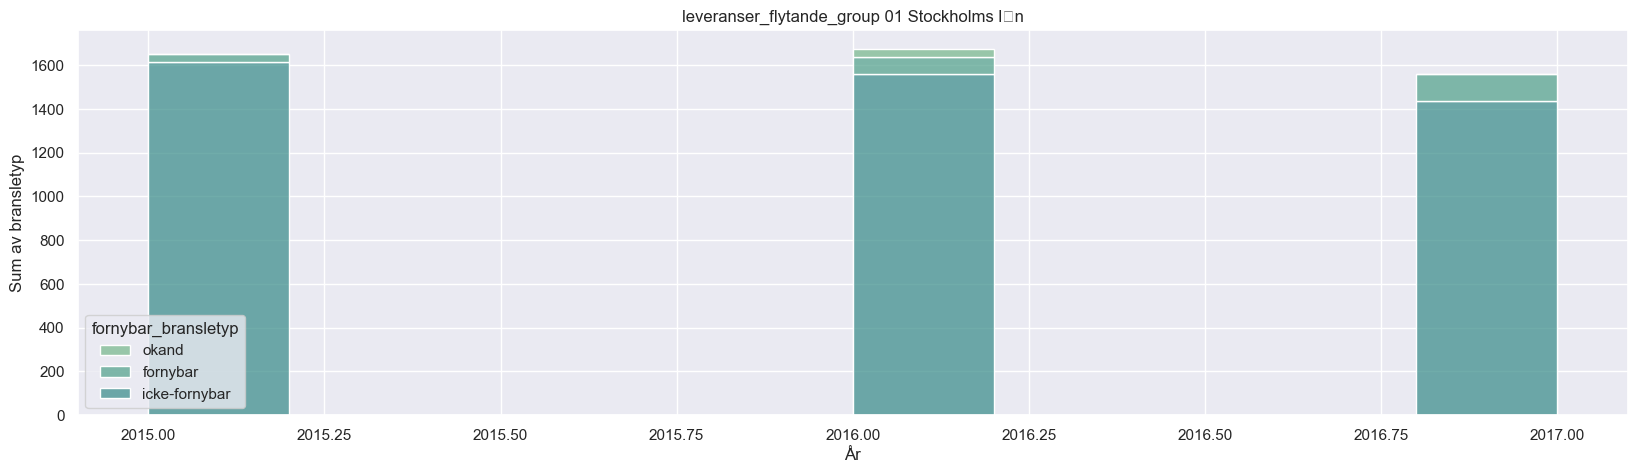

0117 �ster�ker


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


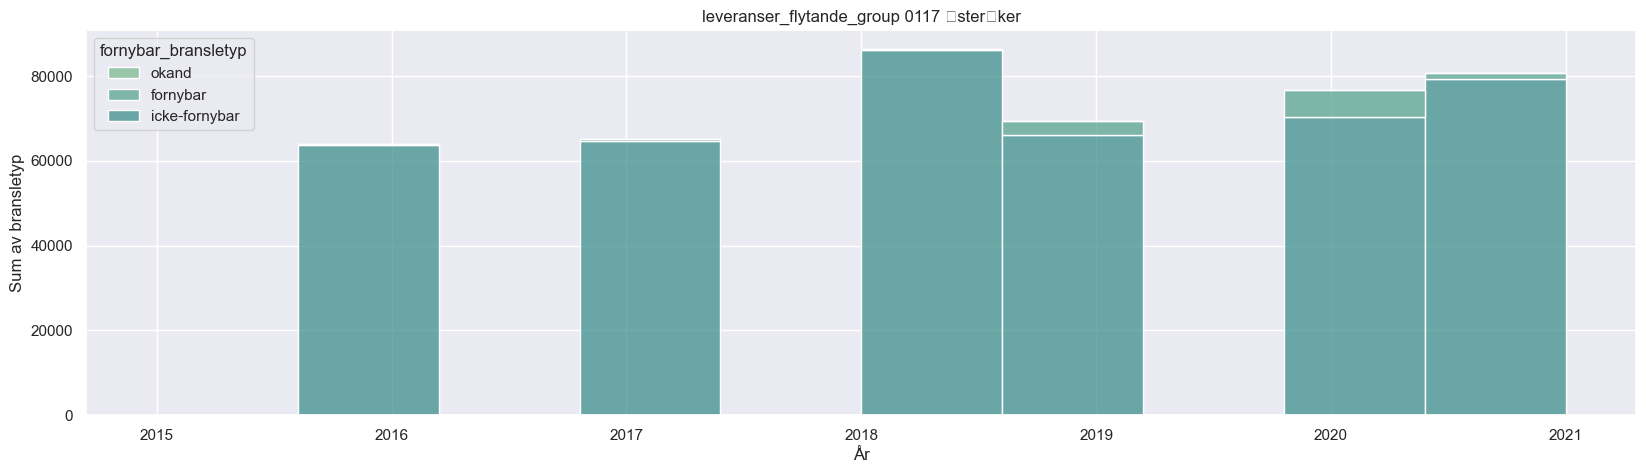

0160 T�by


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


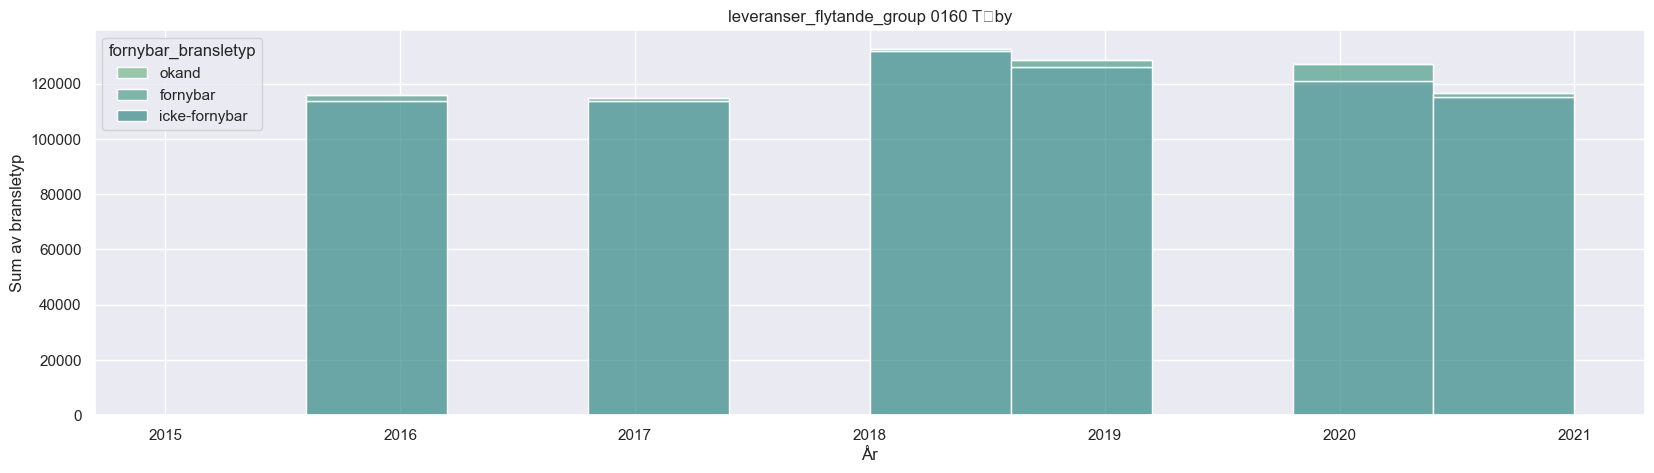

0180 Stockholm


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


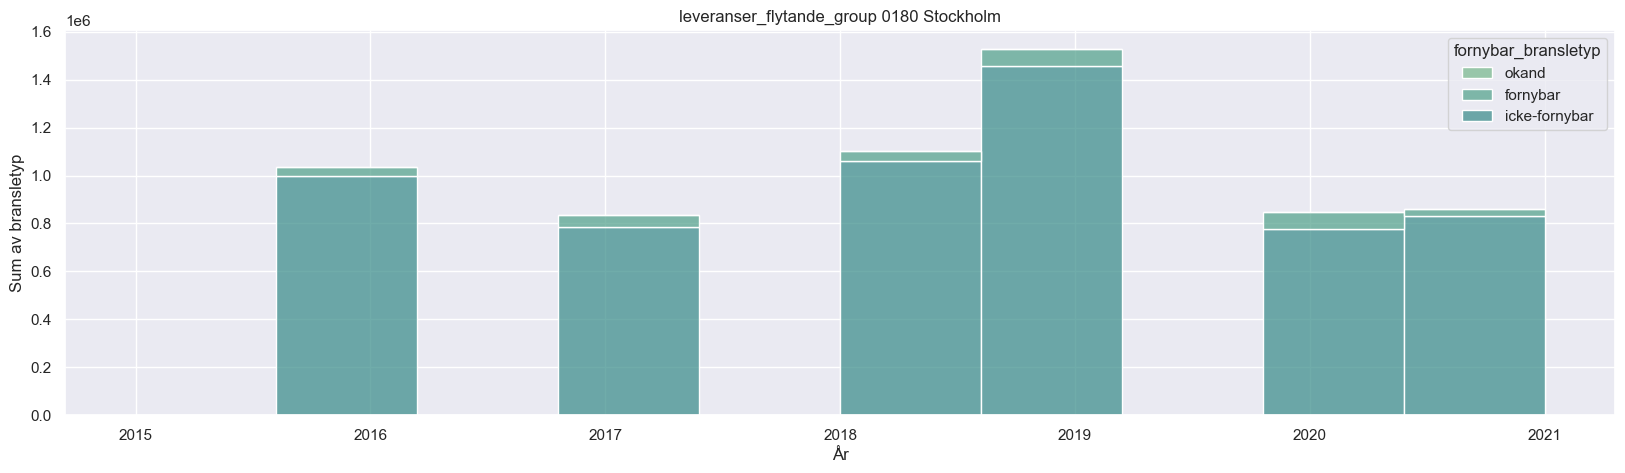

09 Gotlands l�n


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


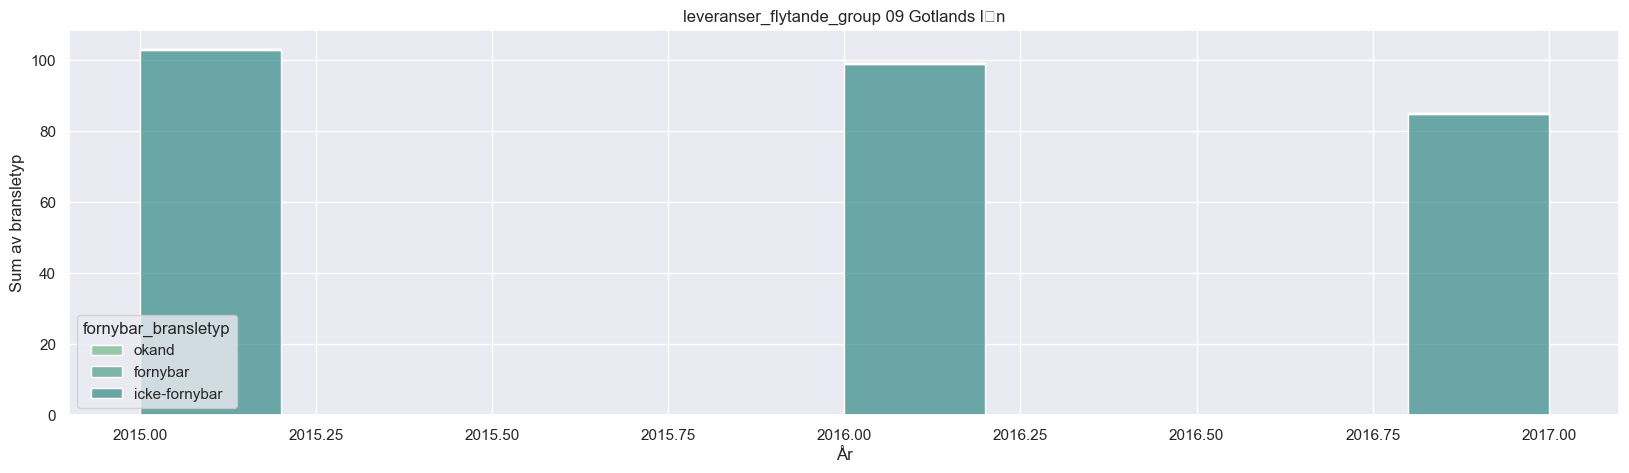

0980 Gotland


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


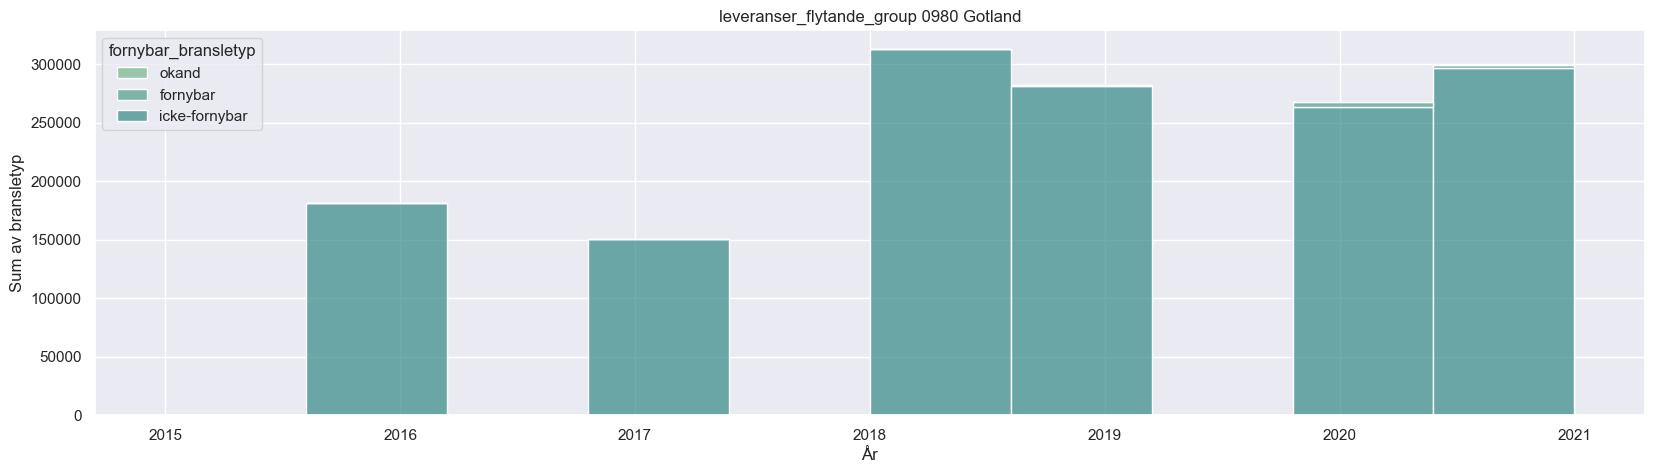

1480 G�teborg


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


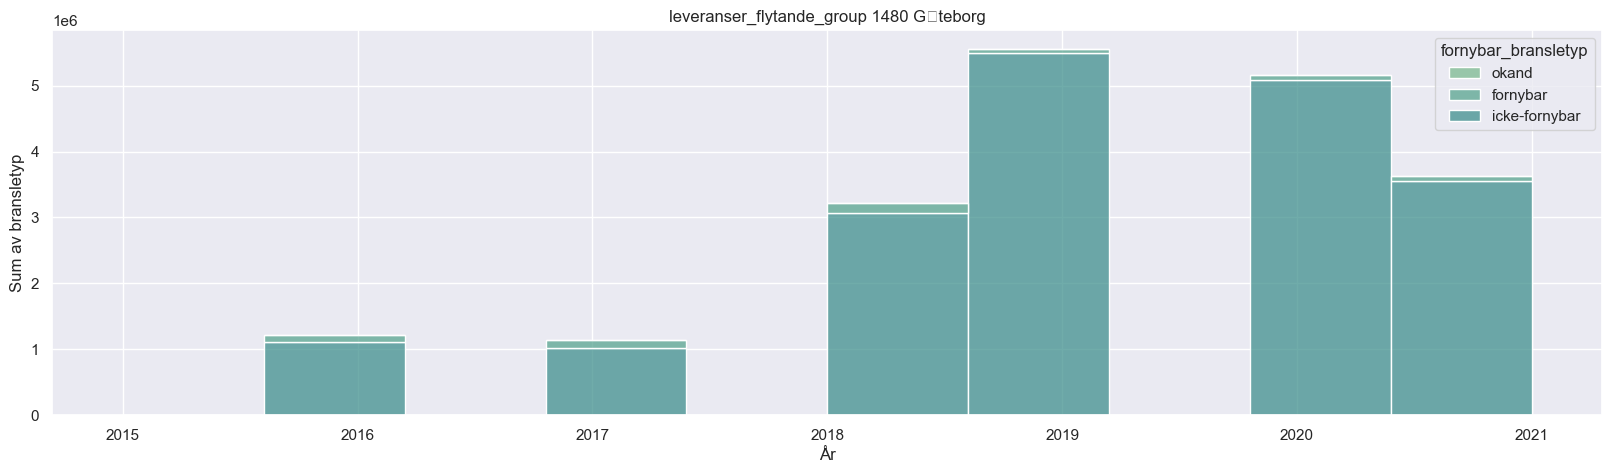

22 V�sternorrlands l�n


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


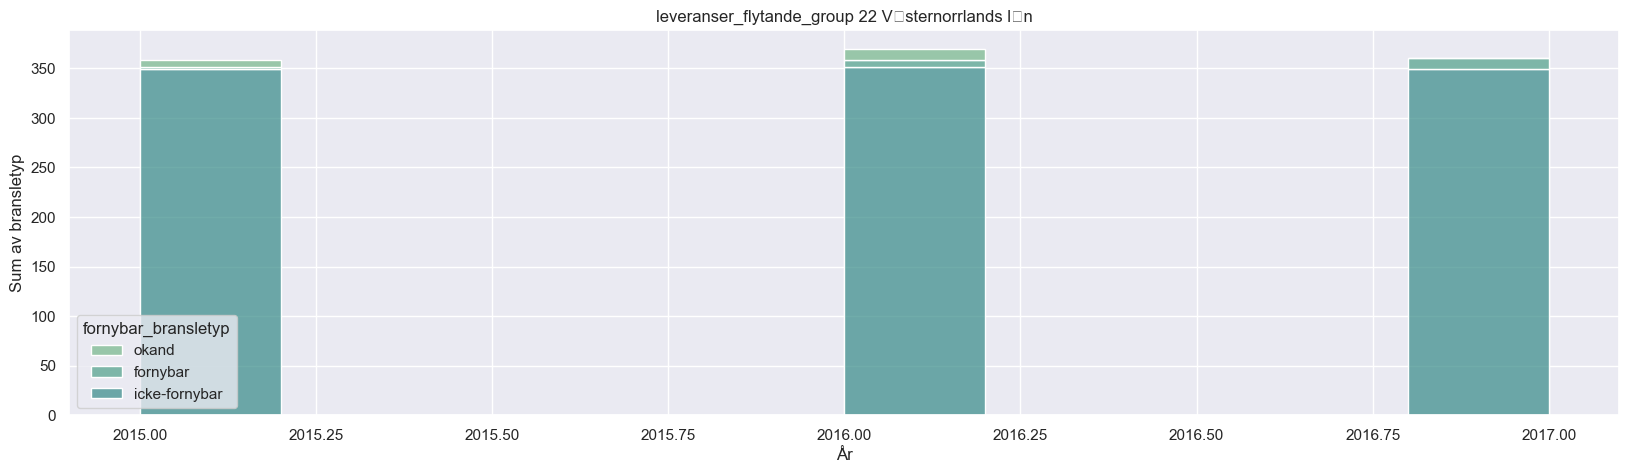

2581 Pite�


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


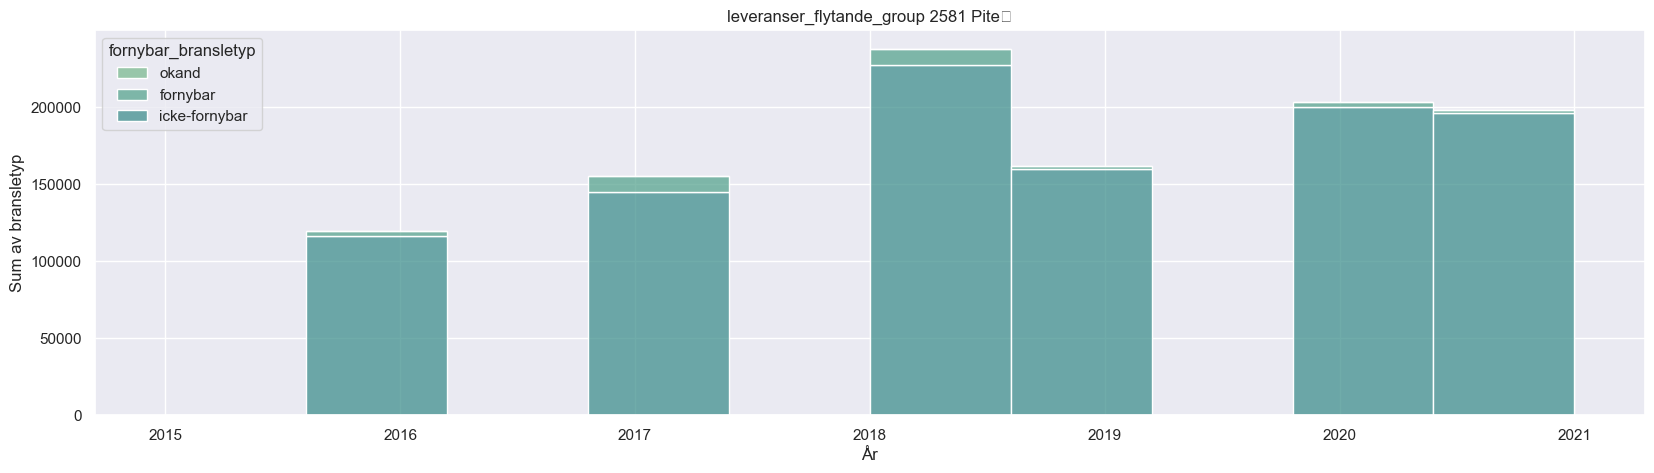

00 Riket


c:\ProgramData\Anaconda3\envs\thisone\lib\site-packages\seaborn\distributions.py:385: UserWarning: `bins` cannot be 'auto' when using weights. Setting `bins=10`, but you will likely want to adjust.
  warnings.warn(msg, UserWarning)


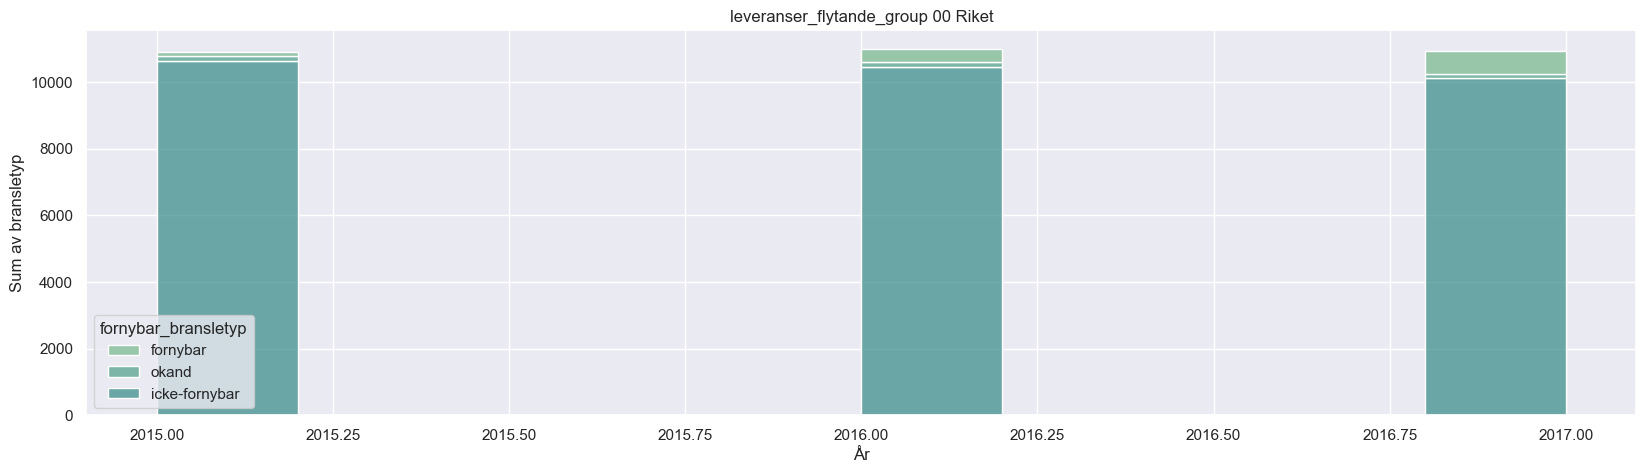

In [7]:
## leveranser_flytande

leveranser_flytande_group = leveranser_flytande.groupby(['region', 'ar', 'fornybar_bransletyp'], as_index=False
                 ).agg(
                        Mean=('m3', np.mean),
                        Sum=('m3', np.sum), 
                        Avg=('m3', np.average),
                        Count=('m3', 'count'),
                        Max=('m3', np.max),
                        Min=('m3', np.min)
                 ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# temp['col'] = temp.region + temp.ar.astype(str) + temp.fornybar_bransletyp


# # leveranser_flytande_group.Count.where(leveranser_flytande_group.Count.gt(0)).min(0)
# leveranser_flytande_group.Count.where(leveranser_flytande_group.Count.gt(0)).max(0)

# leveranser_flytande_group.region.tail(20).drop_duplicates(keep='first').reset_index(drop=True)

# leveranser_flytande_group = leveranser_flytande_group[leveranser_flytande_group.region.isin(
#     ["1484 Lysekil", "1780 Karlstad", "0581 Norrk�ping", "0680 J�nk�ping", "0180 Stockholm", "1480 G�teborg"])].reset_index(
    # drop=True)

leveranser_flytande_group.ar = leveranser_flytande_group.ar.astype(int)

leveranser_flytande_group = leveranser_flytande_group[leveranser_flytande_group.ar >= 2015].reset_index(
    drop=True)


# leveranser_flytande_group

for region in leveranser_flytande_group.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[leveranser_flytande_group.region == region].reset_index(drop=True)
    fig = sns.histplot(data=data, 
                    x=data.ar.astype(int), 
                    weights='Sum', 
                    hue='fornybar_bransletyp', 
                    multiple='stack',
                    # bins=7
                    )
    fig.set_title('leveranser_flytande_group ' + region)
    fig.set_xlabel('År')
    fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### elproduction_bransleanvandning

01 Stockholms l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


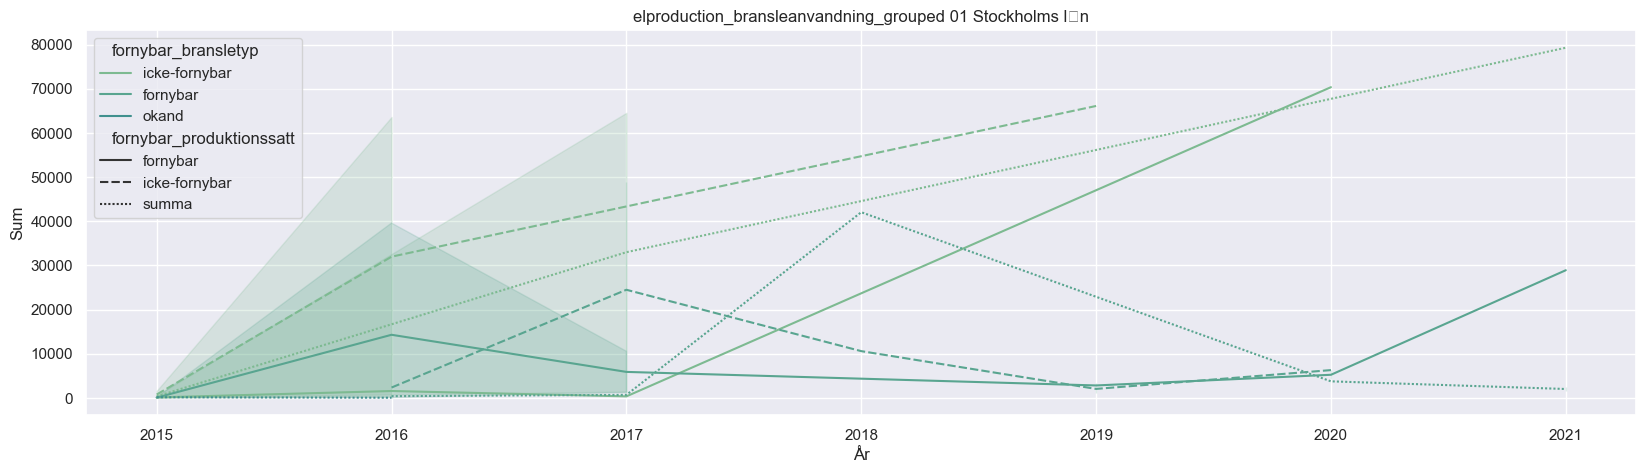

0117 �ster�ker


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


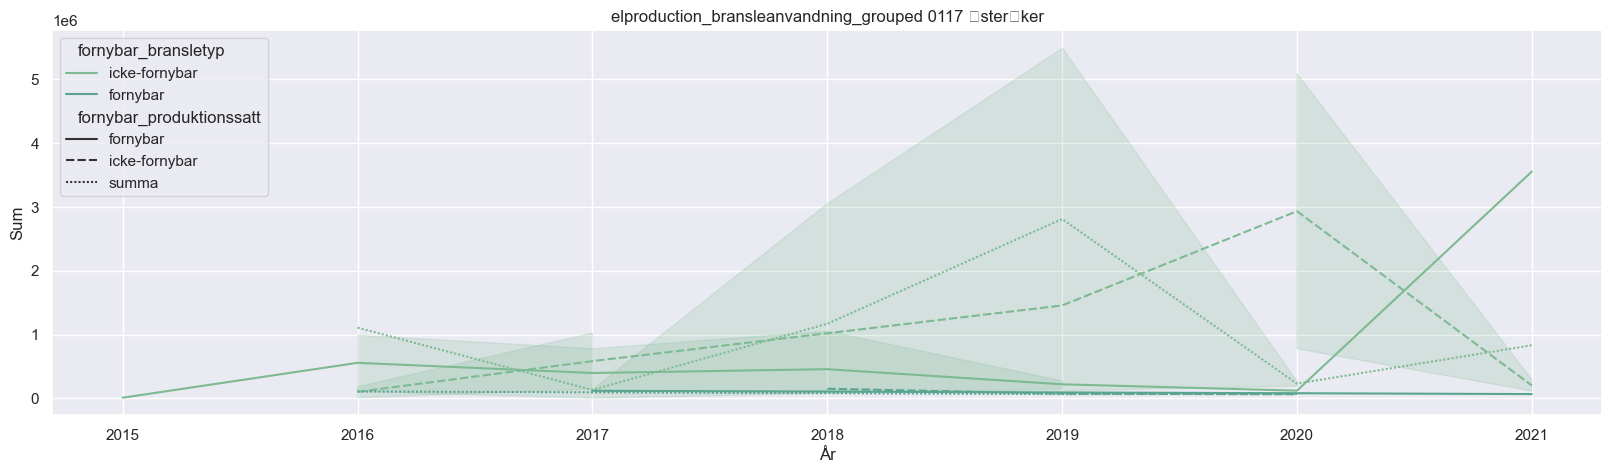

0160 T�by


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


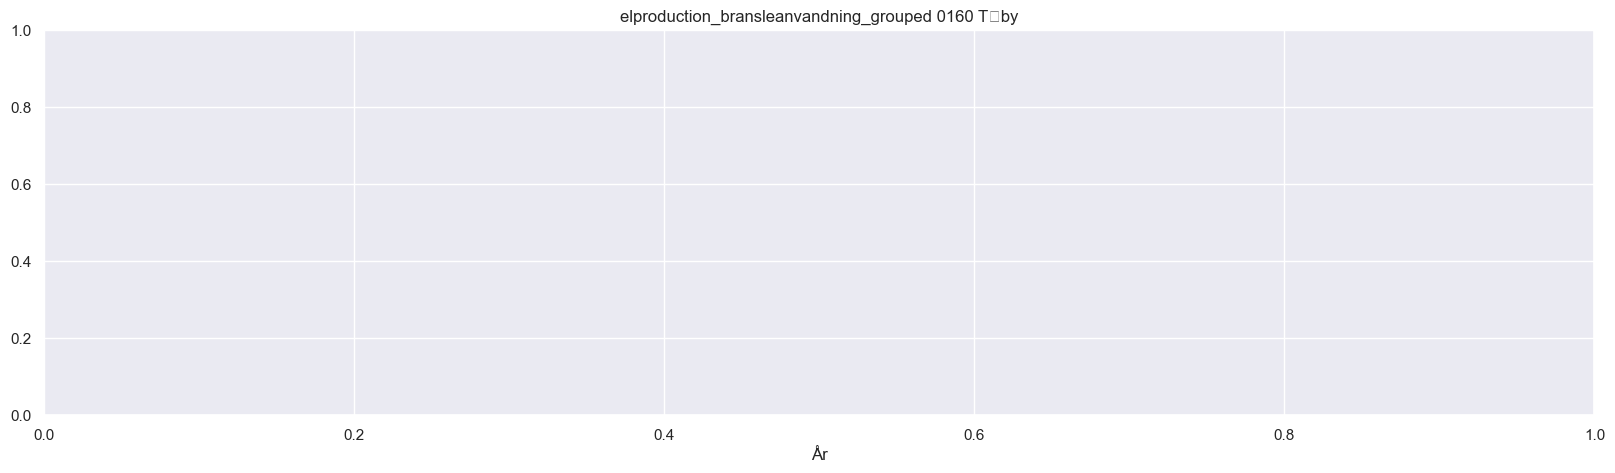

0180 Stockholm


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(


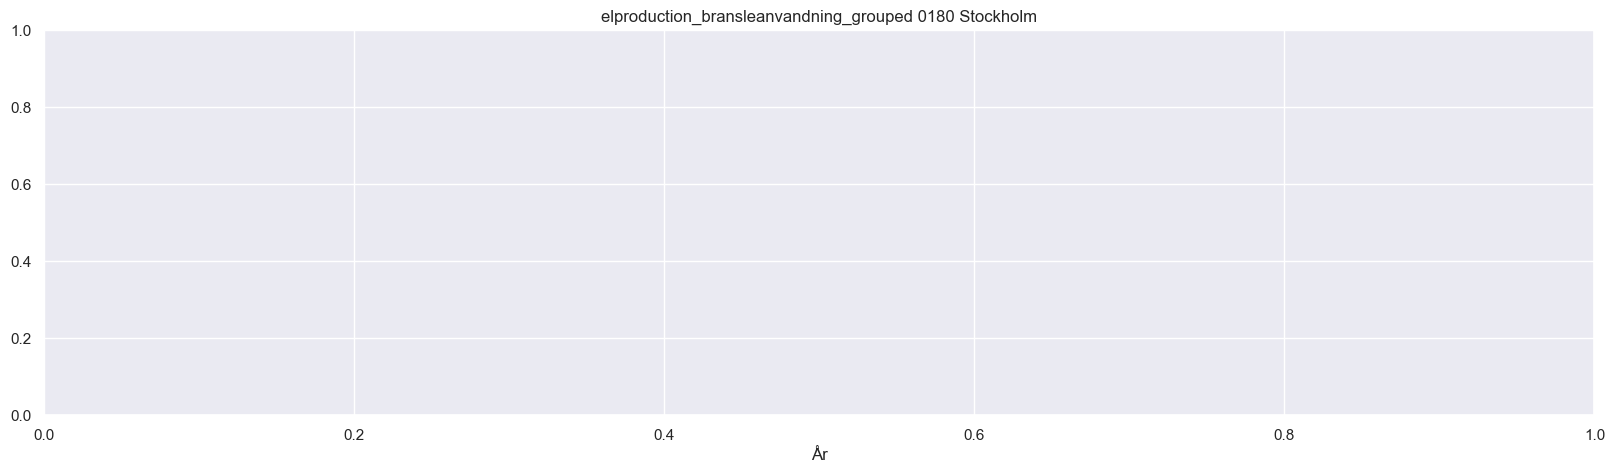

09 Gotlands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


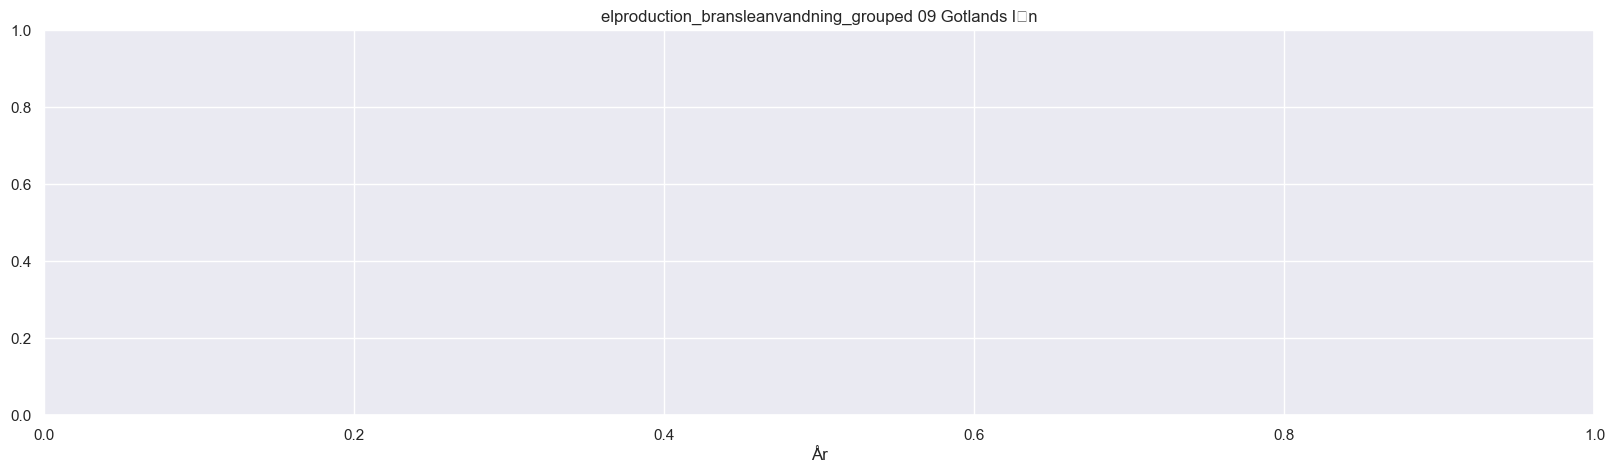

0980 Gotland


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(


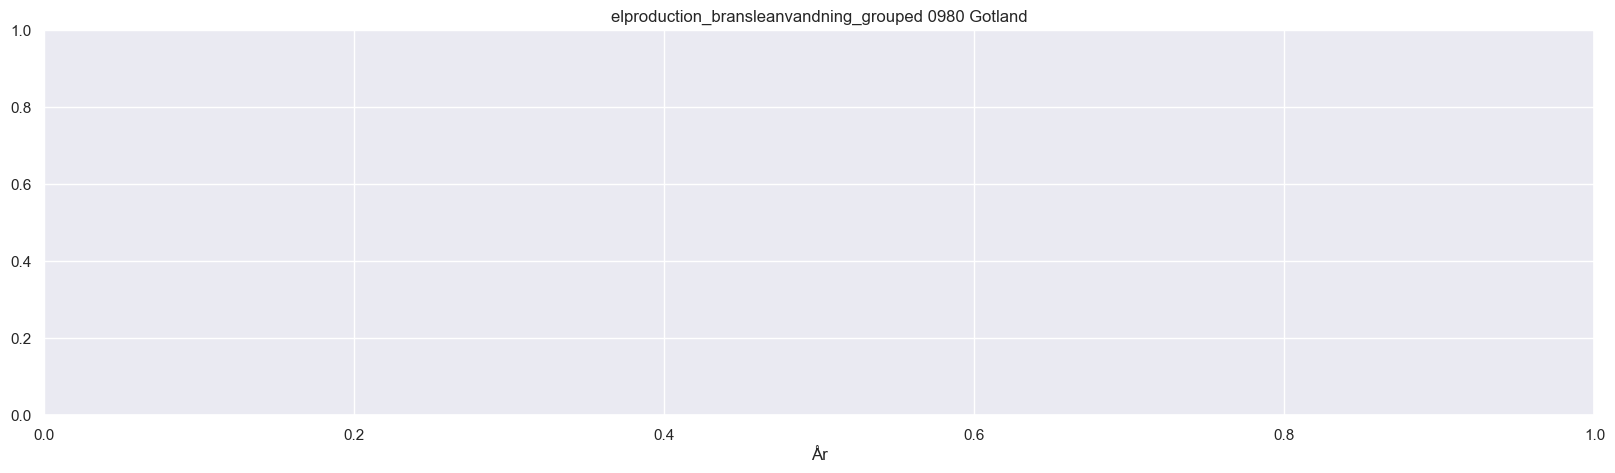

1480 G�teborg


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


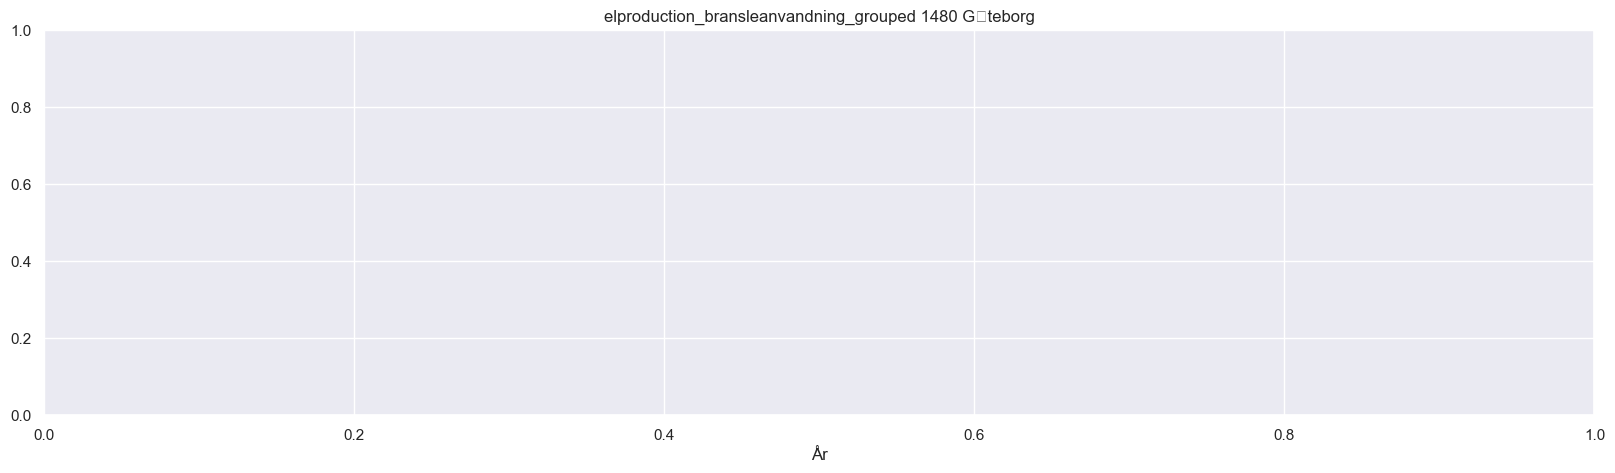

2581 Pite�


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


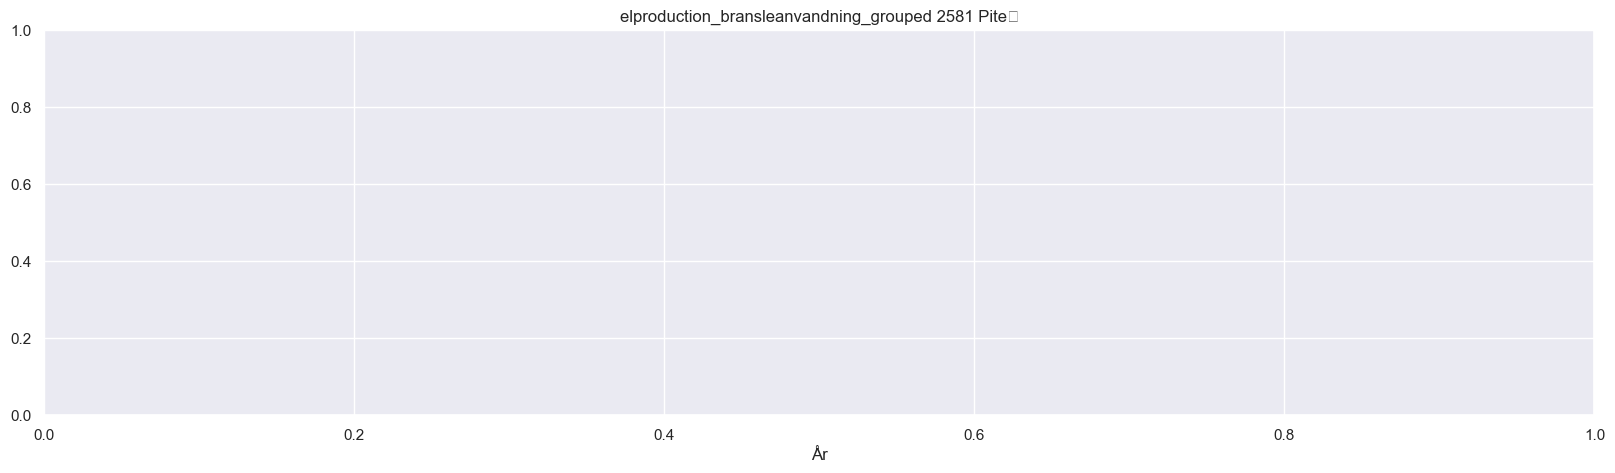

22 V�sternorrlands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


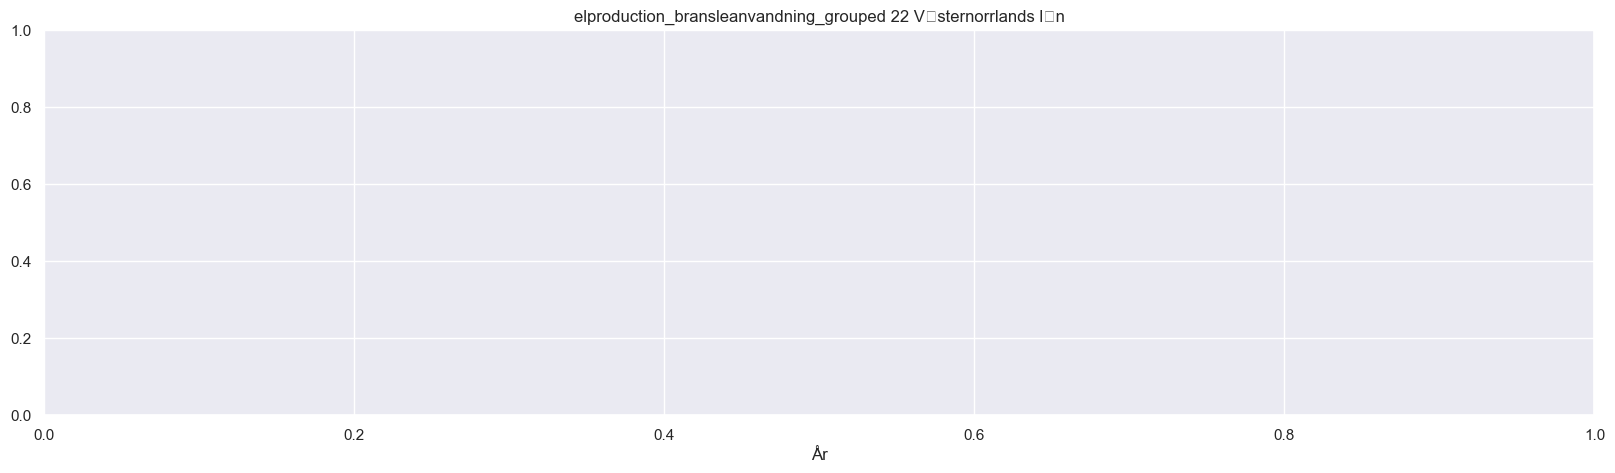

00 Riket


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\247465885.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(


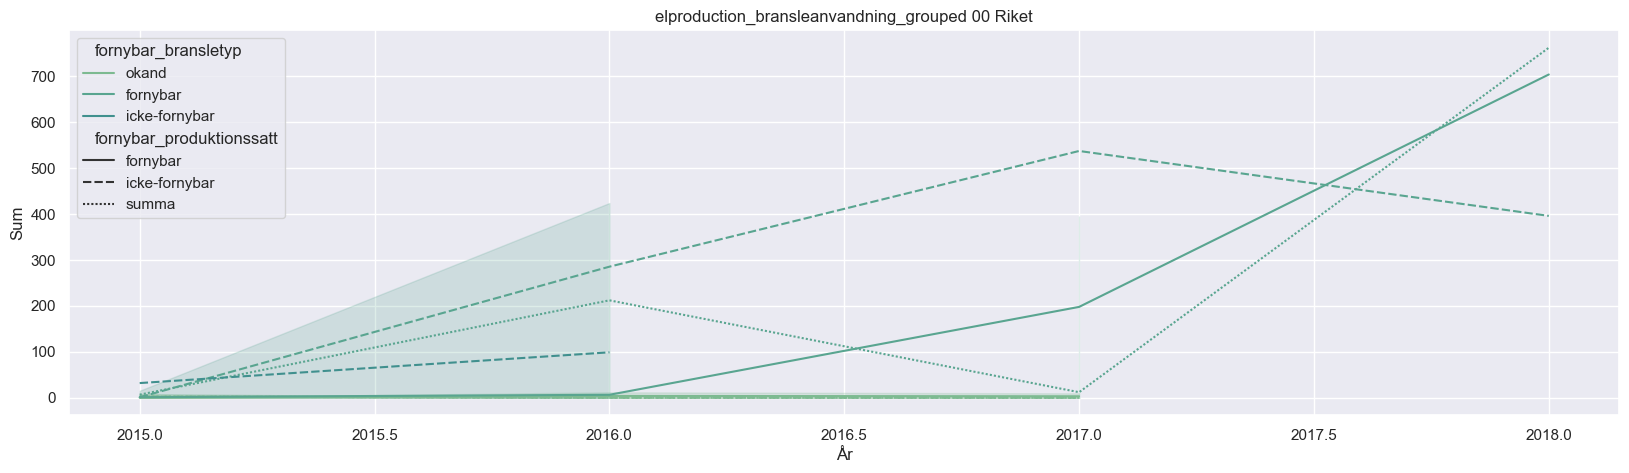

In [8]:
# elproduction_bransleanvandning


elproduction_bransleanvandning_grouped = elproduction_bransleanvandning.groupby(['region', 'ar', 'fornybar_bransletyp', 'fornybar_produktionssatt'], as_index=False
                                                        ).agg(
                                                            Mean=('MWh', np.mean),
                                                            Sum=('MWh', np.sum),
                                                            Avg=('MWh', np.average),
                                                            Count=('MWh', 'count'),
                                                            Max=('MWh', np.max),
                                                            Min=('MWh', np.min)
                                                        ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# elproduction_bransleanvandning_grouped


# elproduction_bransleanvandning_grouped.region.tail(70).drop_duplicates(
#     keep='first').reset_index(drop=True)


# # '00 Riket', '03 Uppsala l�n', '1383 Varberg', '13 Hallands l�n', '0382 �sthammar'

# elproduction_bransleanvandning_grouped = elproduction_bransleanvandning_grouped[elproduction_bransleanvandning_grouped.region.isin([
#     '00 Riket', '03 Uppsala l�n', '1383 Varberg', '13 Hallands l�n', '0382 �sthammar'])].reset_index(drop=True)

# elproduction_bransleanvandning_groued.ar = elproduction_bransleanvandning_groued.ar.astype(int)

# leveranser_flytande_group = leveranser_flytande_group[leveranser_flytande_group.ar >= 2015].reset_index(
#     drop=True)


# elproduction_bransleanvandning_grouped


for region in elproduction_bransleanvandning_grouped.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[elproduction_bransleanvandning_grouped.region == region].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue='fornybar_bransletyp',
                       style=elproduction_bransleanvandning_grouped.fornybar_produktionssatt)
    fig.set_title('elproduction_bransleanvandning_grouped ' + region)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### fjarrvarmeproduktion

0160 T�by


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


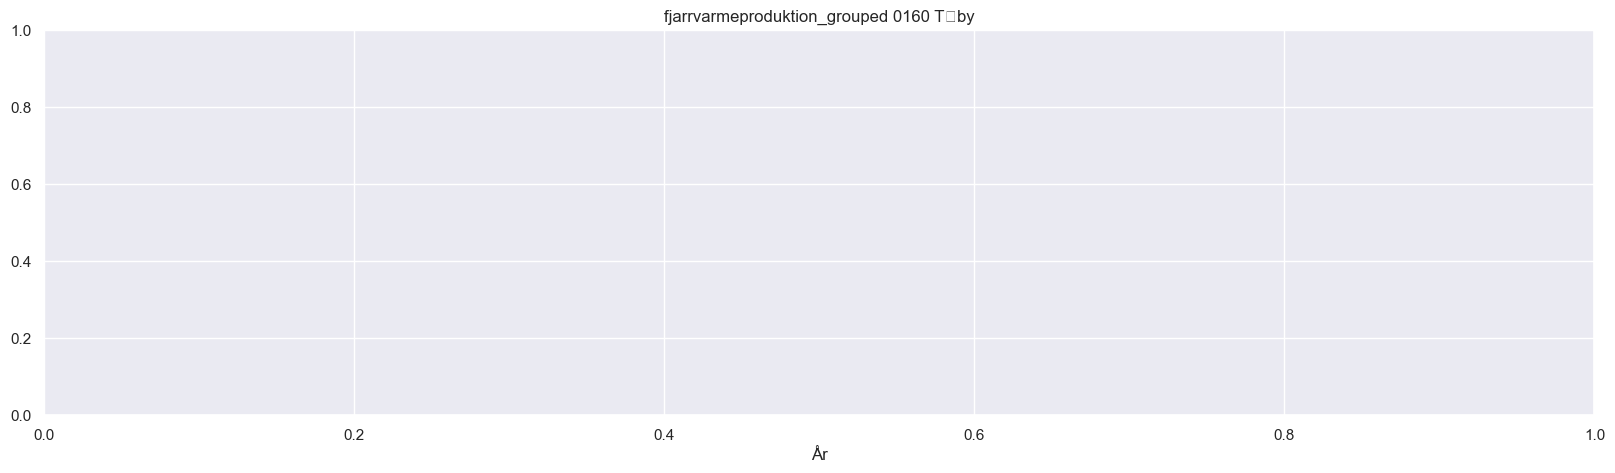

09 Gotlands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


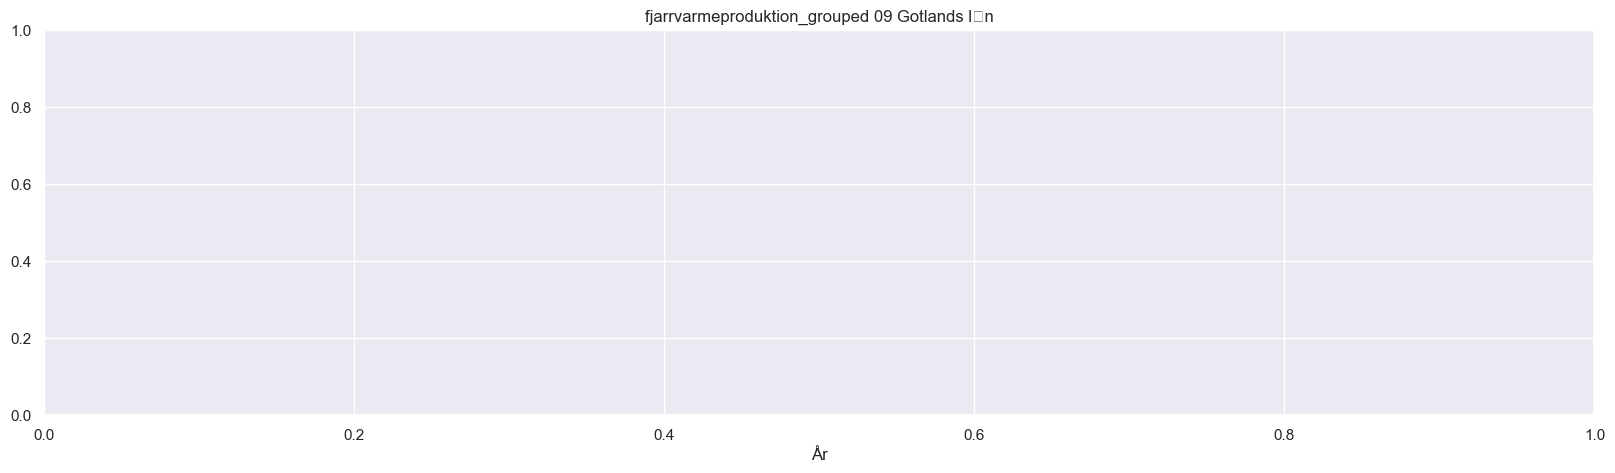

0980 Gotland


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(


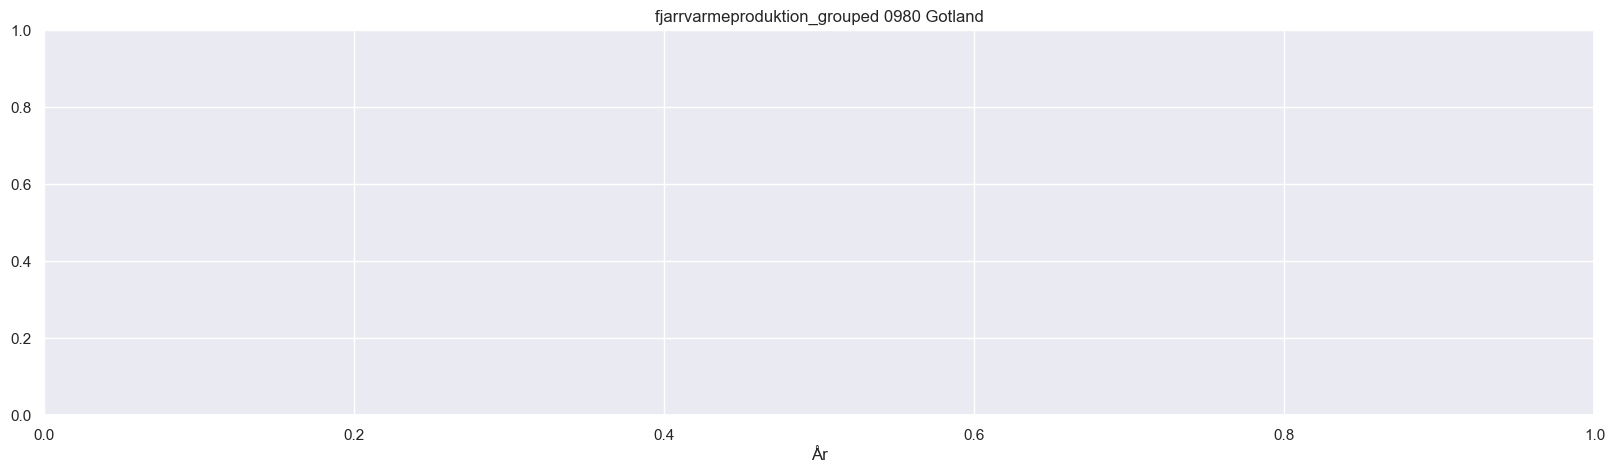

1480 G�teborg


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


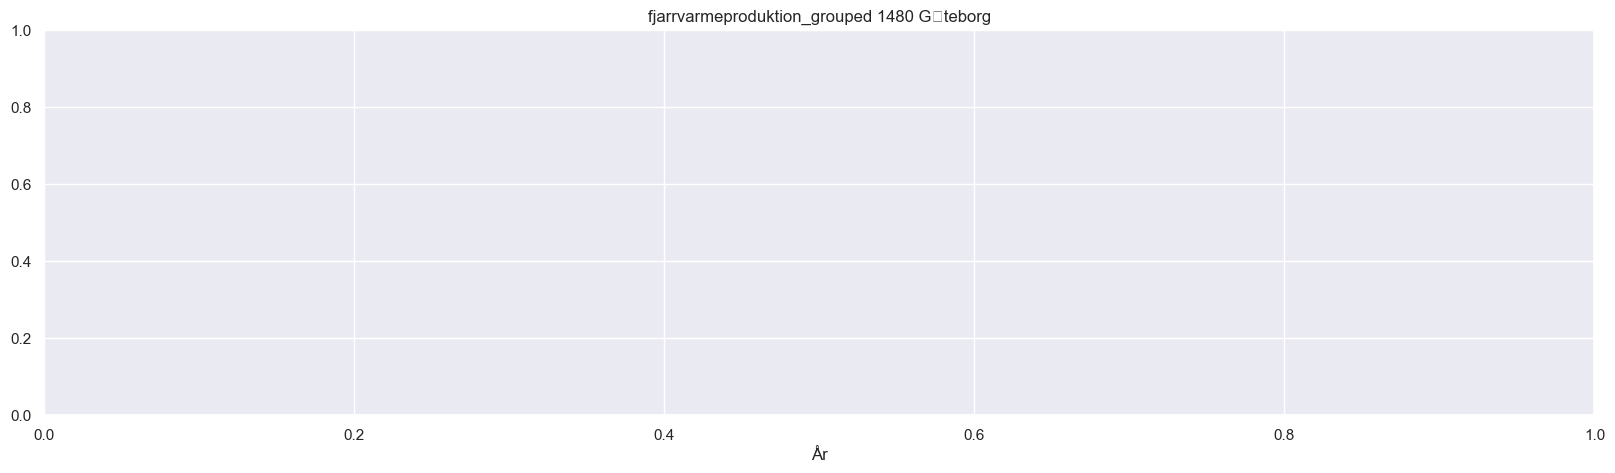

2581 Pite�


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


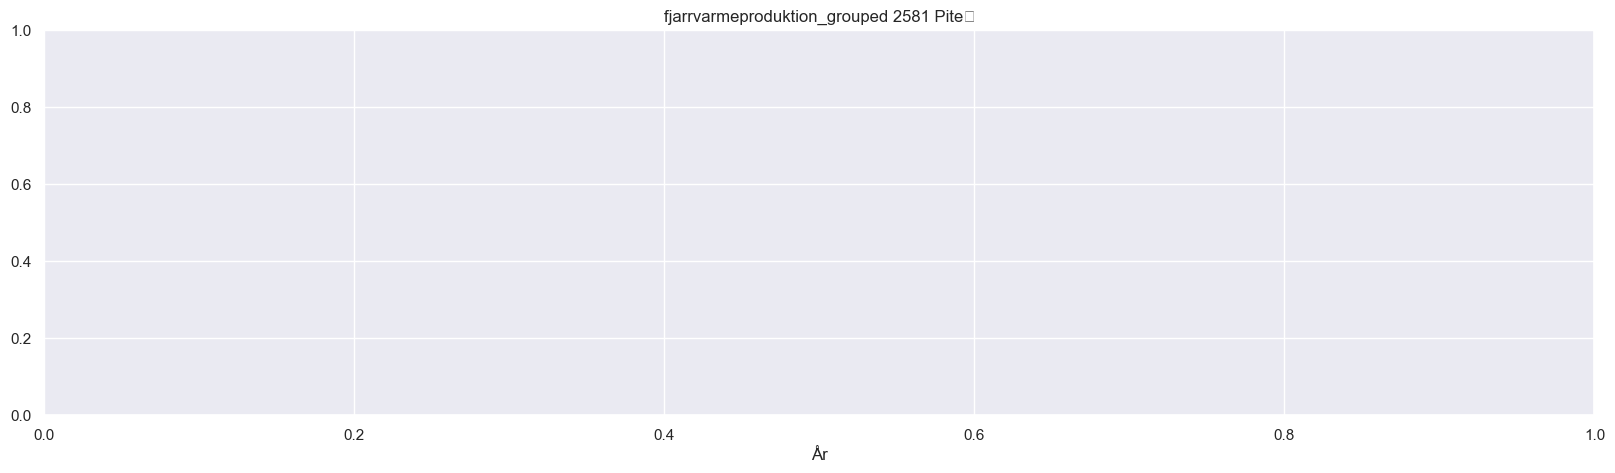

0117 �ster�ker


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


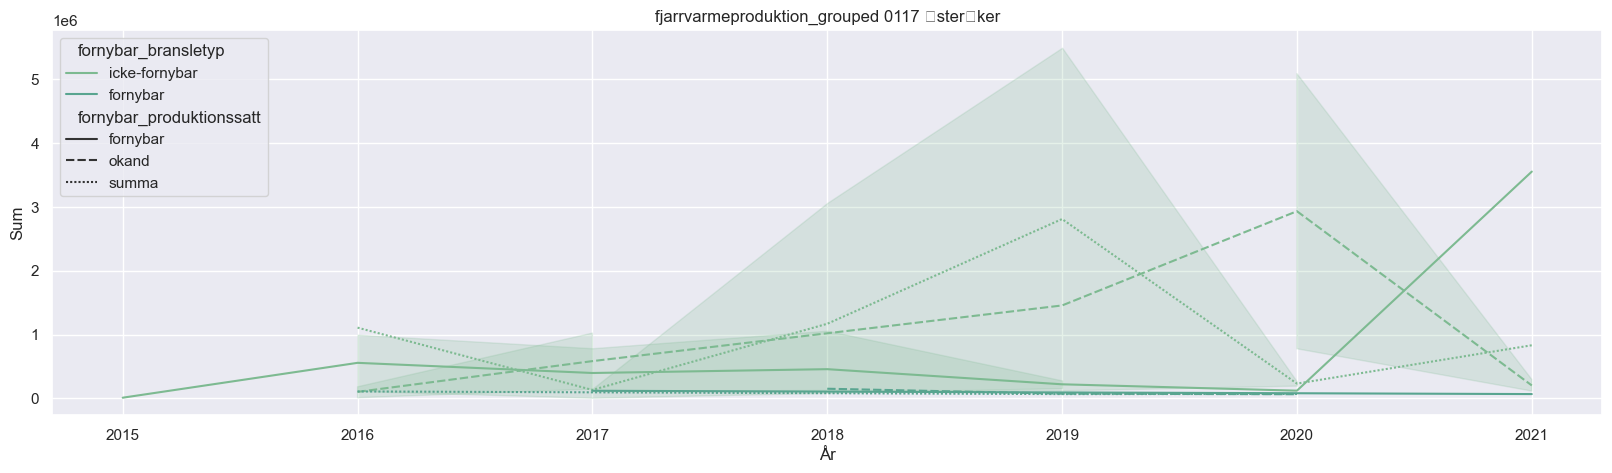

22 V�sternorrlands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


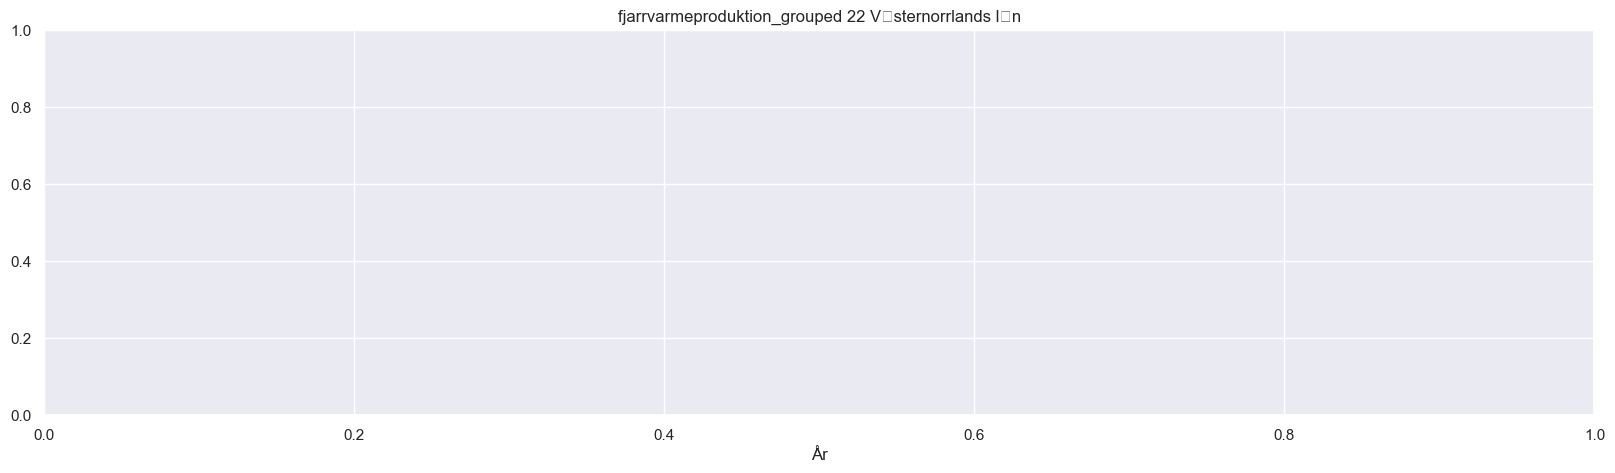

00 Riket


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(


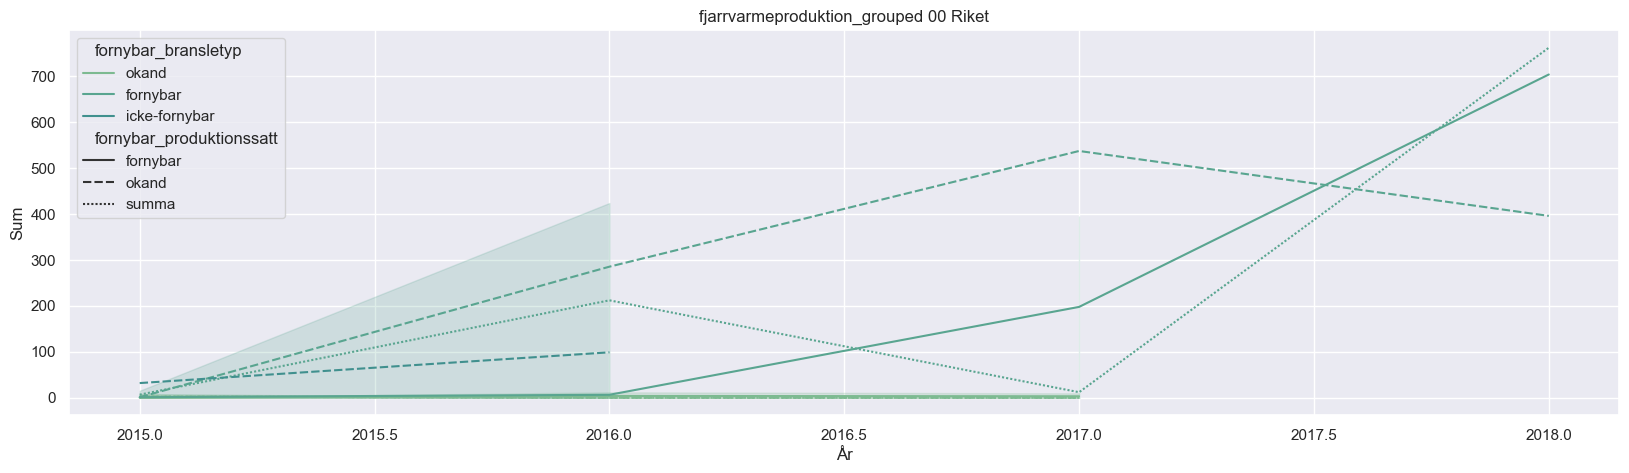

0180 Stockholm


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(


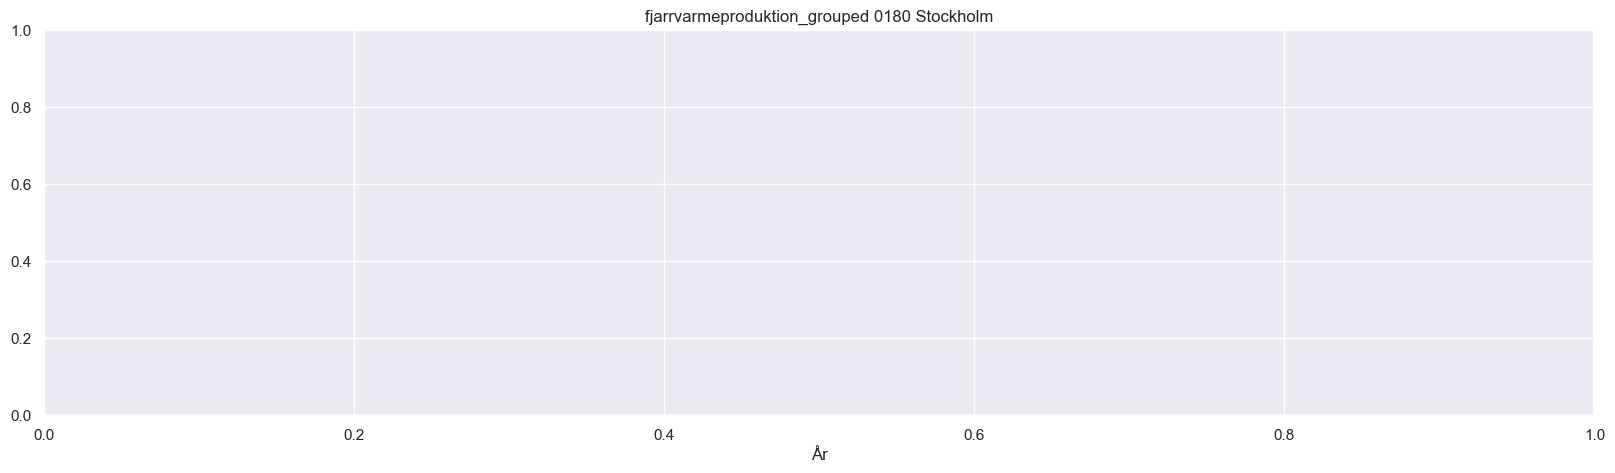

01 Stockholms l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\3209294984.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


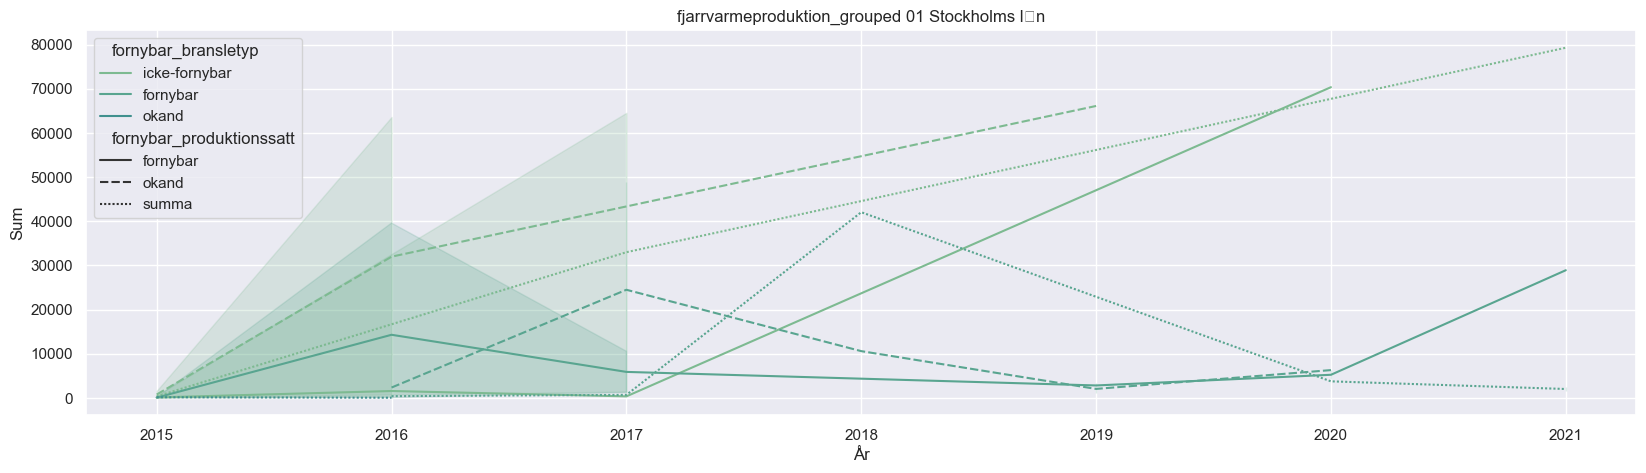

In [9]:
# fjarrvarmeproduktion


fjarrvarmeproduktion_grouped = fjarrvarmeproduktion.groupby(['region', 'ar', 'fornybar_bransletyp', 'fornybar_produktionssatt'], as_index=False
                                                        ).agg(
                                                            Mean=('MWh', np.mean),
                                                            Sum=('MWh', np.sum),
                                                            Avg=('MWh', np.average),
                                                            Count=('MWh', 'count'),
                                                            Max=('MWh', np.max),
                                                            Min=('MWh', np.min)
                                                        ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# fjarrvarmeproduktion_grouped



# fjarrvarmeproduktion_grouped.region.tail(20).drop_duplicates(
#     keep='first').reset_index(drop=True)

# # '2580 Lule�','2582 Boden','2581 Pite�','2583 Haparanda','2584 Kiruna','00 Riket'


# fjarrvarmeproduktion_grouped = fjarrvarmeproduktion_grouped[fjarrvarmeproduktion_grouped.region.isin([
#     '2580 Lule�', '2582 Boden', '2581 Pite�', '2583 Haparanda', '2584 Kiruna', '00 Riket'])].reset_index(drop=True)


# fjarrvarmeproduktion_grouped


for region in fjarrvarmeproduktion_grouped.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[fjarrvarmeproduktion_grouped.region == region].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue='fornybar_bransletyp',
                       style=fjarrvarmeproduktion_grouped.fornybar_produktionssatt)
    fig.set_title('fjarrvarmeproduktion_grouped ' + region)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### slutanvandning

0160 T�by


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


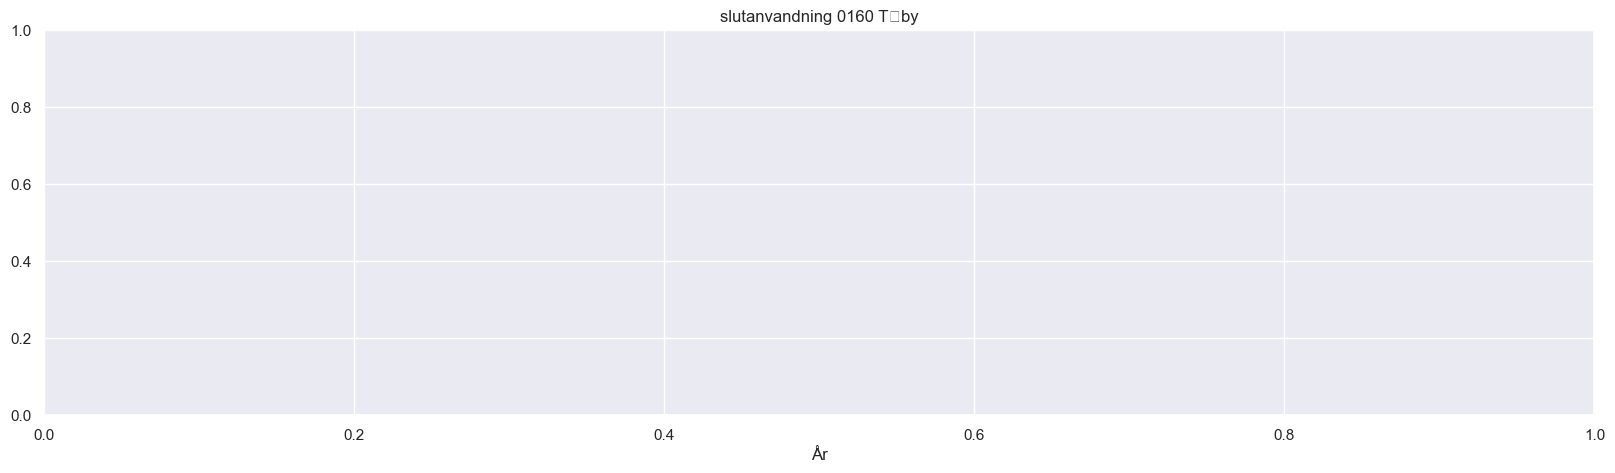

0180 Stockholm


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(


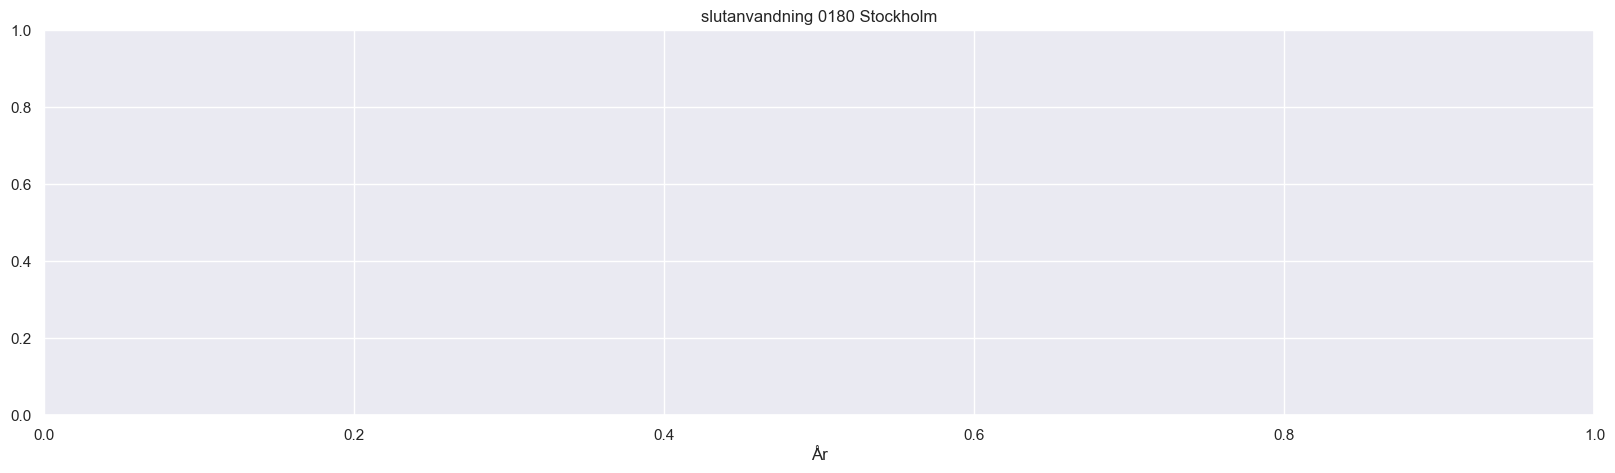

09 Gotlands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


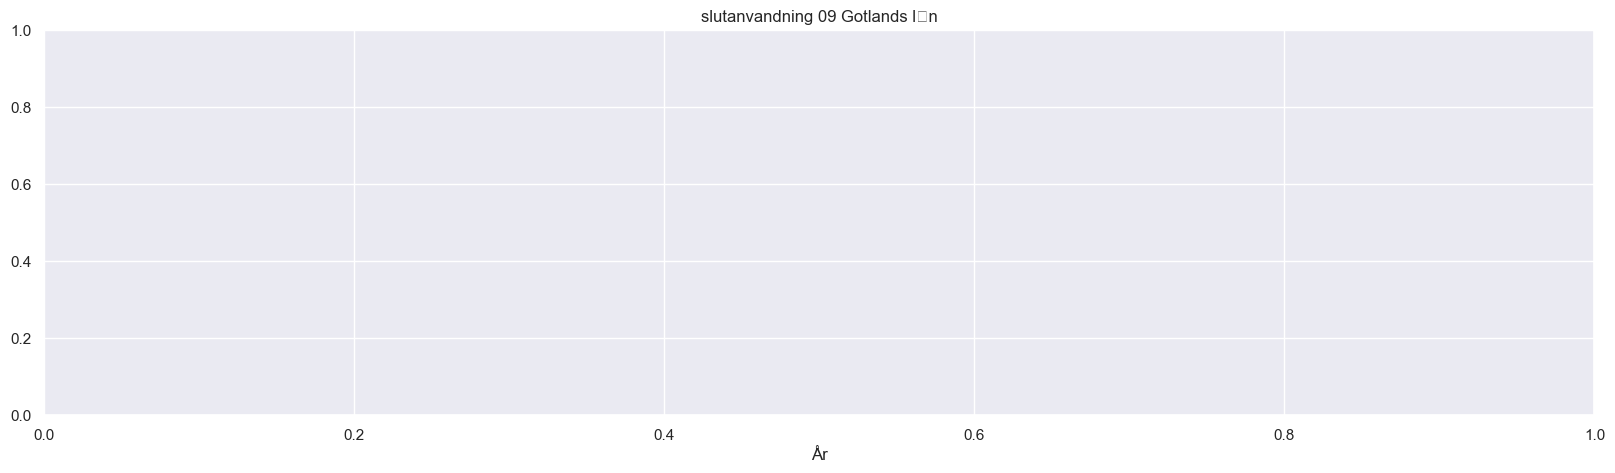

0980 Gotland


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(


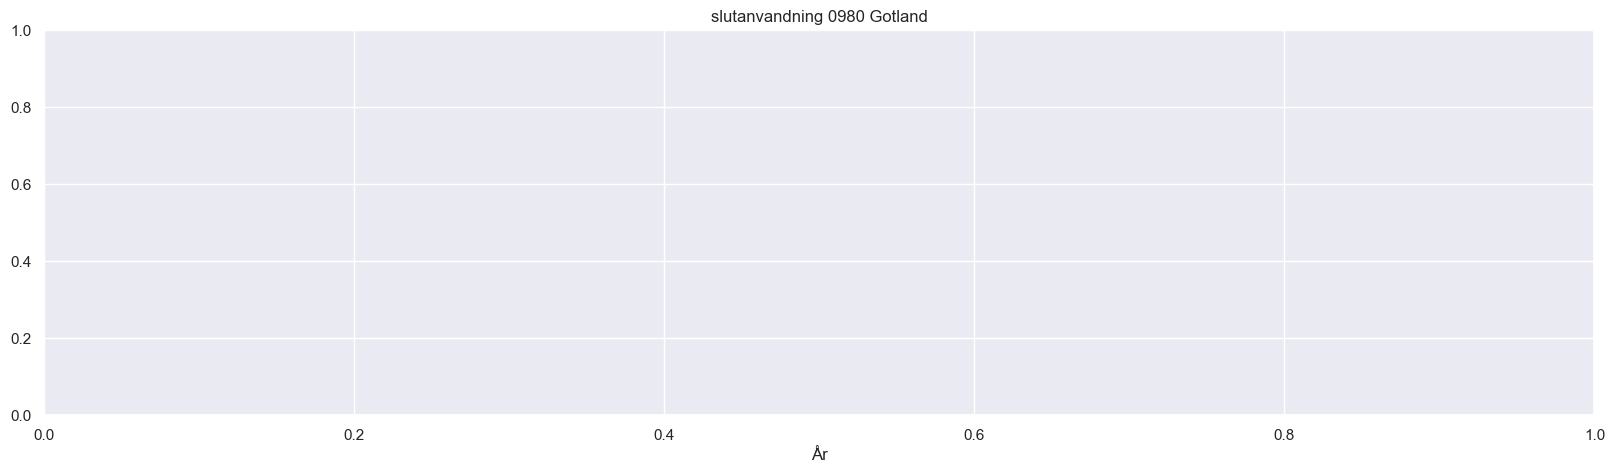

01 Stockholms l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


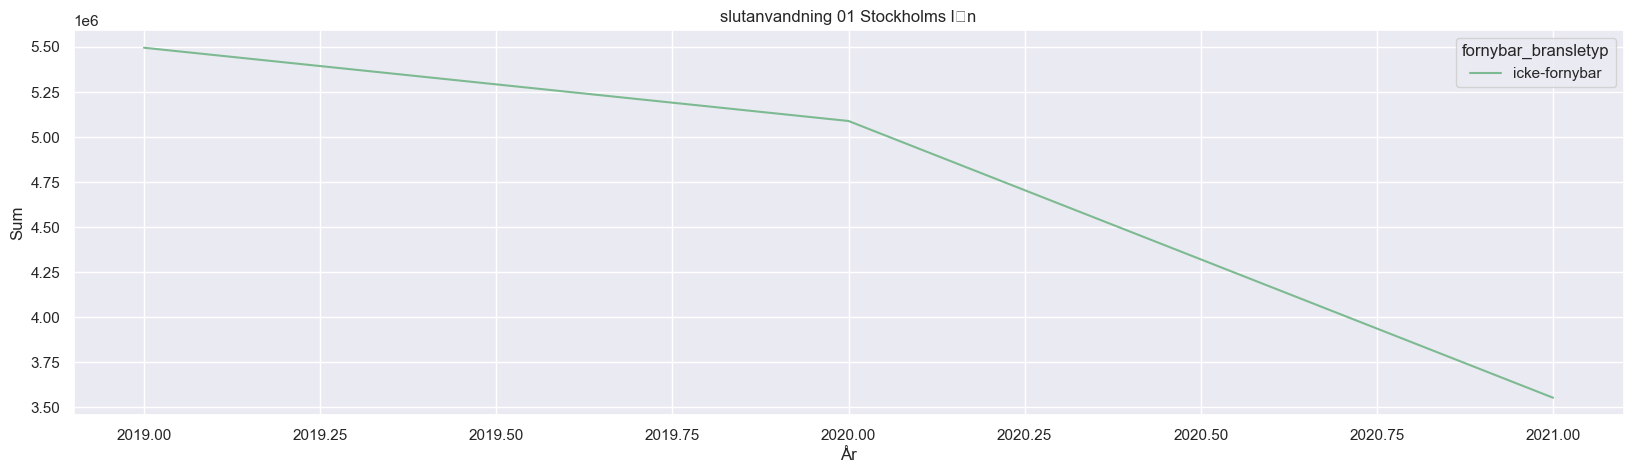

0117 �ster�ker


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


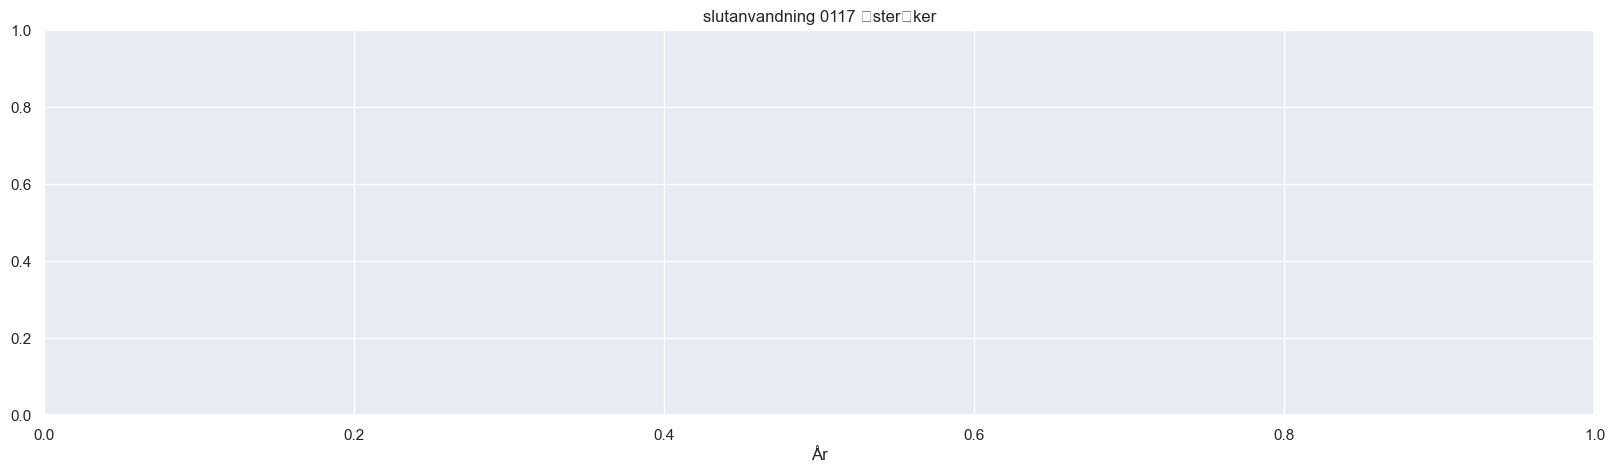

1480 G�teborg


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


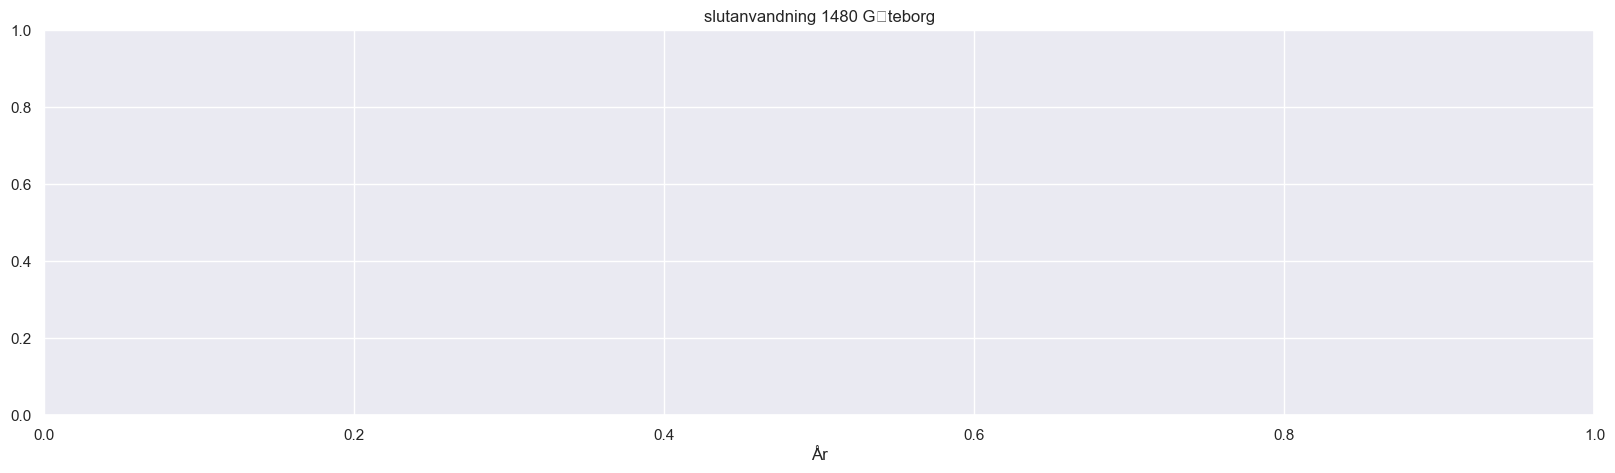

22 V�sternorrlands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


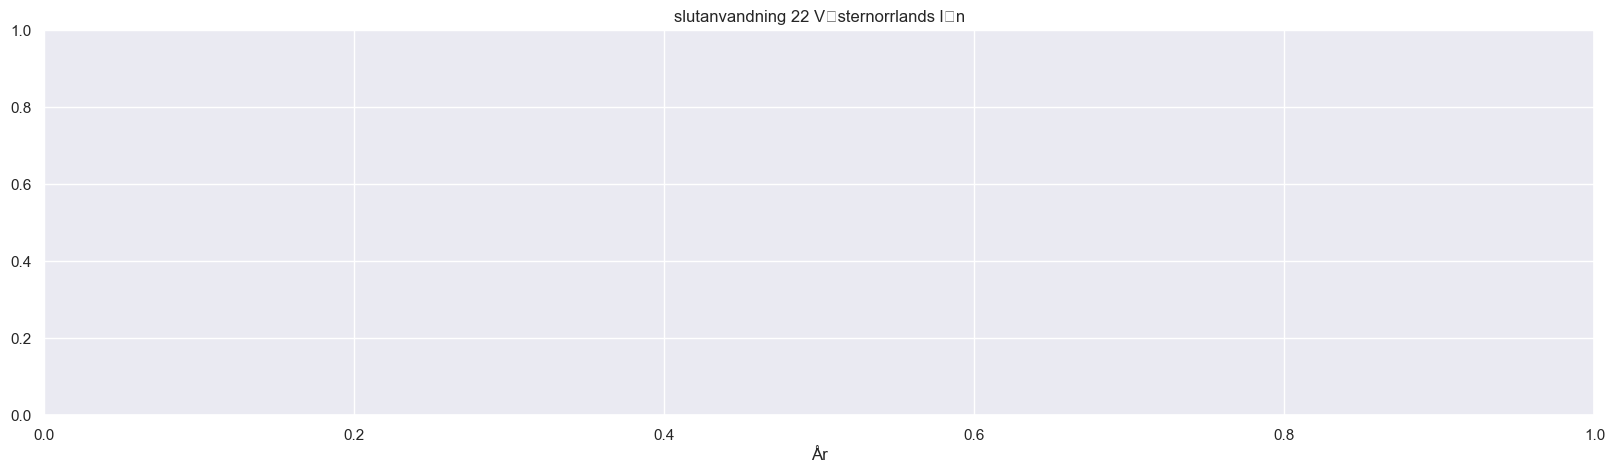

2581 Pite�


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


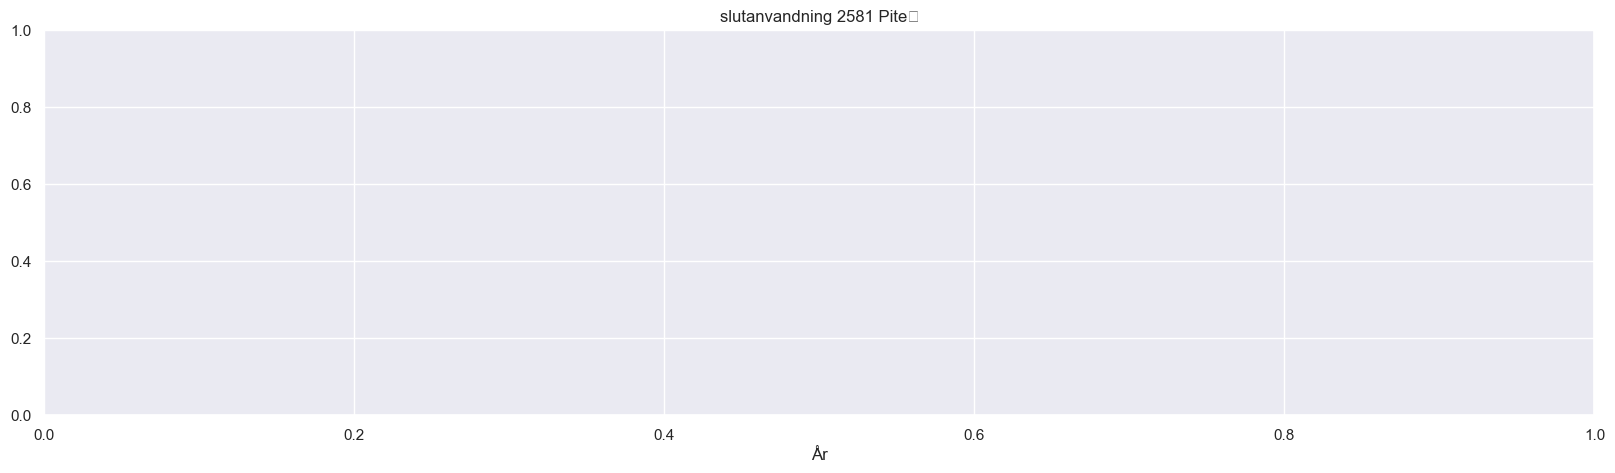

00 Riket


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\2006133424.py:35: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(


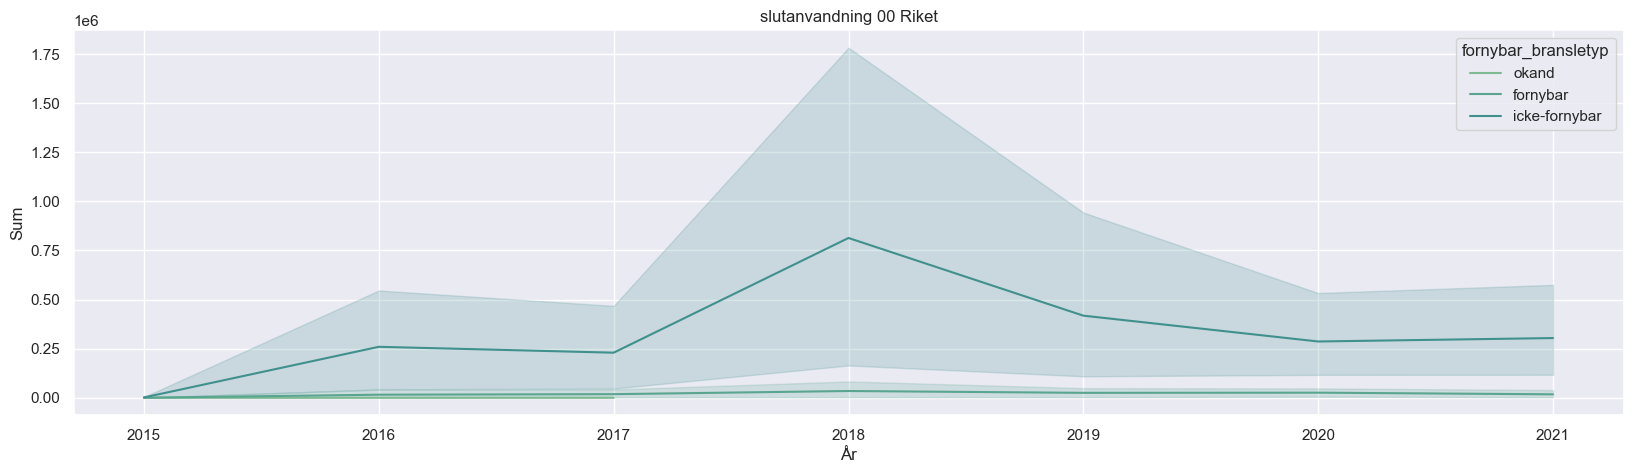

In [10]:
# slutanvandning



slutanvandning_grouped = slutanvandning.groupby(['region', 'ar', 'fornybar_bransletyp', 'forbrukarkategori'], as_index=False
                                                        ).agg(
                                                            Mean=('MWh', np.mean),
                                                            Sum=('MWh', np.sum),
                                                            Avg=('MWh', np.average),
                                                            Count=('MWh', 'count'),
                                                            Max=('MWh', np.max),
                                                            Min=('MWh', np.min)
                                                        ).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# slutanvandning_grouped


# slutanvandning_grouped.region.tail(50).drop_duplicates(
#     keep='first').reset_index(drop=True)

# # '2560 �lvsbyn', '2580 Lule�', '2581 Pite�', '2582 Boden', '2583 Haparanda', '2584 Kiruna'


# slutanvandning_grouped = slutanvandning_grouped[slutanvandning_grouped.region.isin([
#     '2560 �lvsbyn', '2580 Lule�', '2581 Pite�', '2582 Boden', '2583 Haparanda', '2584 Kiruna'])].reset_index(drop=True)


# slutanvandning_grouped


for region in slutanvandning_grouped.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[slutanvandning_grouped.region == region].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue='fornybar_bransletyp',
                    #    style=slutanvandning_grouped.forbrukarkategori
                       )
    fig.set_title('slutanvandning ' + region)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### bransleforbukning

frist�ende v�rmeverk


C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


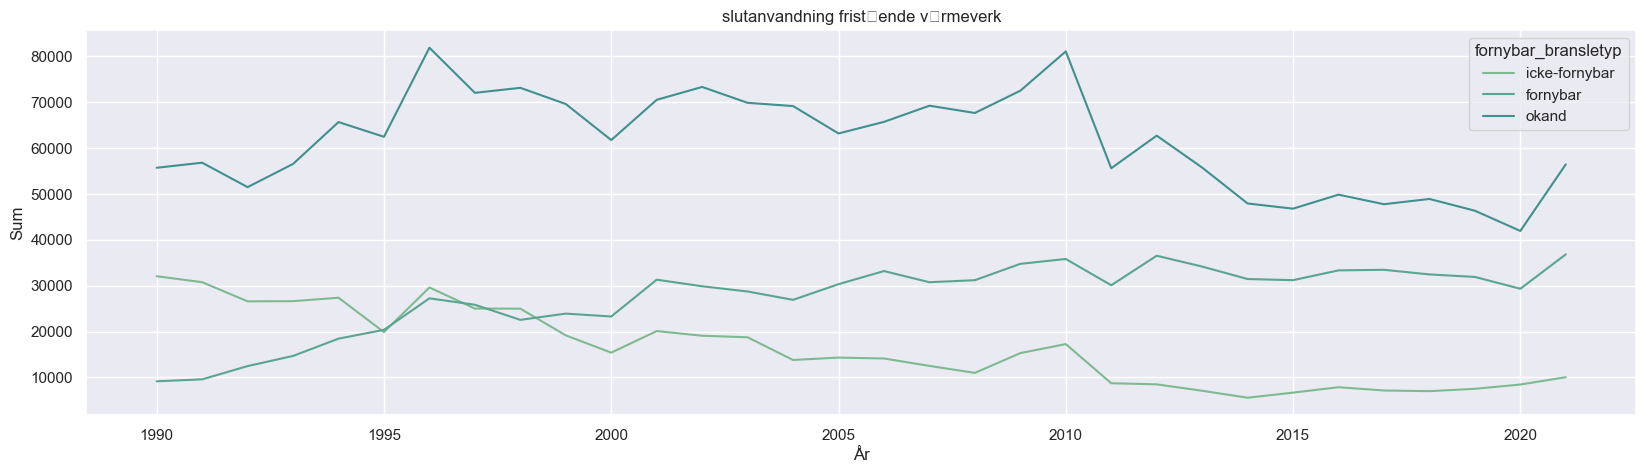

kraftv�rme-v�rmeverk, enbart v�rmeproduktion


C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


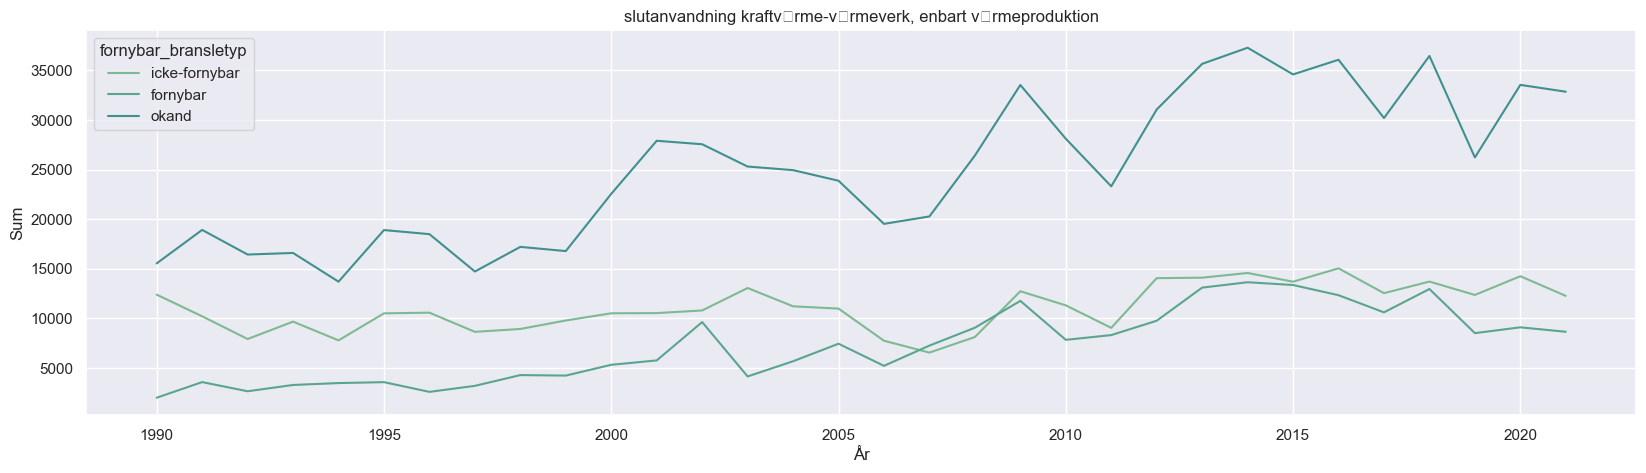

kraftv�rme-v�rmeverk, kraftv�rmedrift


C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


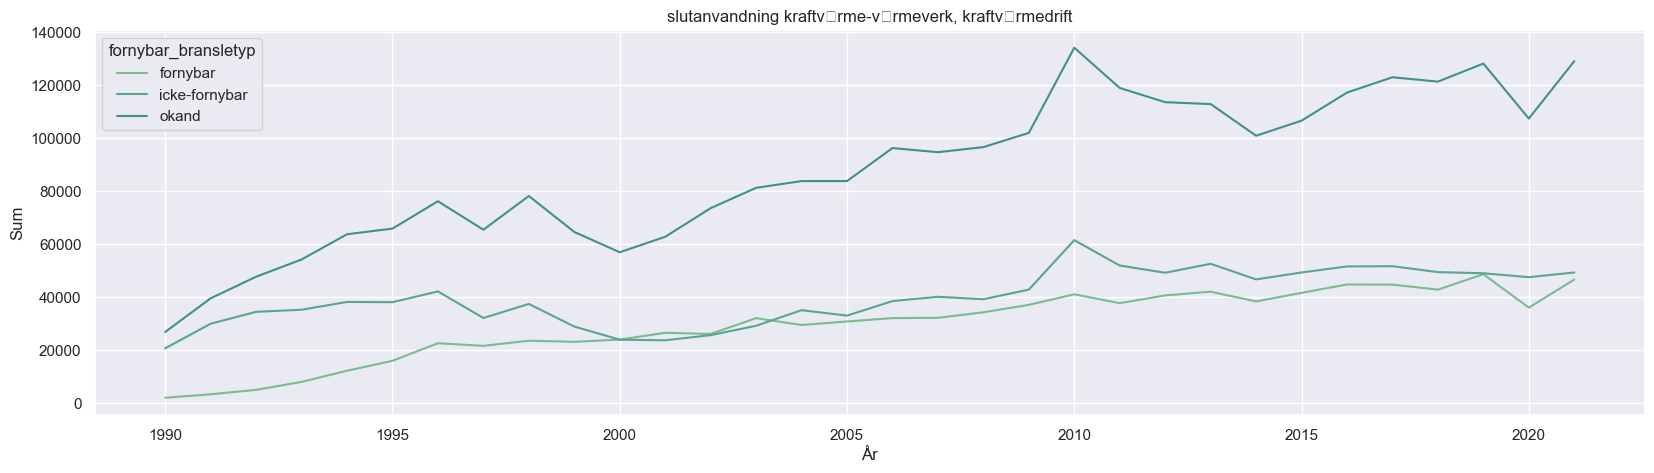

summa


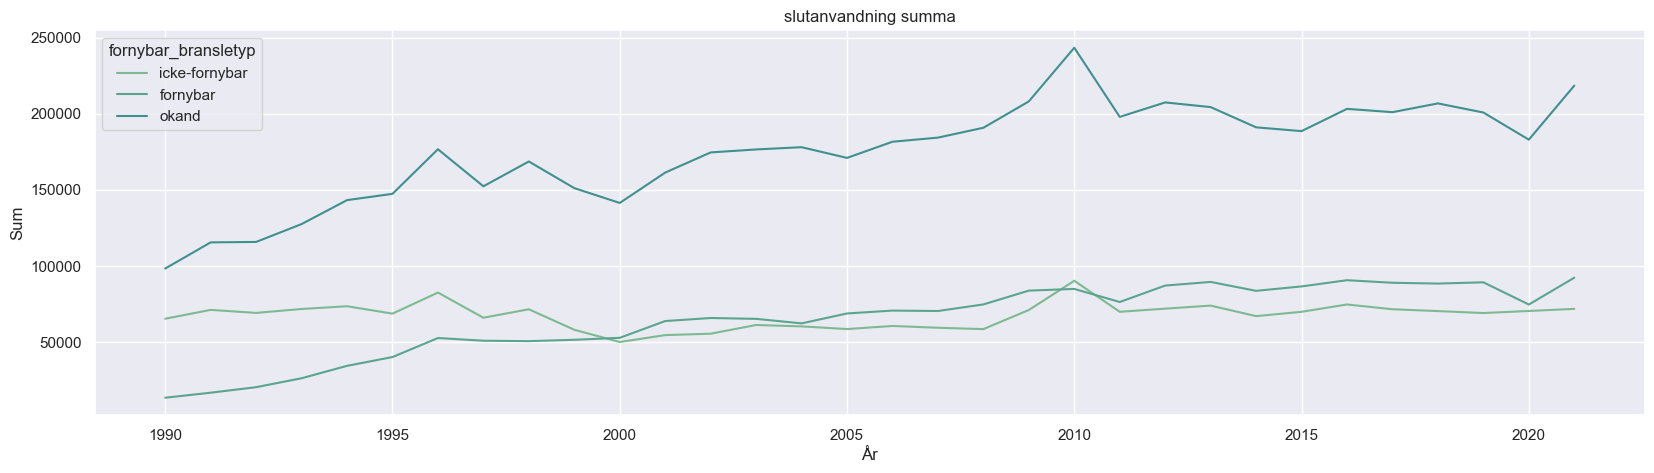

In [11]:
# bransleforbukning

bransleforbrukning = bransleforbrukning.replace('..', 0)

bransleforbrukning.branslefarbrukning = bransleforbrukning.branslefarbrukning.astype(
    float)


bransleforbrukning_grouped = bransleforbrukning.groupby(['ar', 'fornybar_bransletyp', 'produktionsslag'], as_index=False
                                                ).agg(
                                                Mean=('branslefarbrukning', np.mean),
                                                Sum=('branslefarbrukning', np.sum),
                                                Avg=('branslefarbrukning', np.average),
                                                Count=('branslefarbrukning', 'count'),
                                                Max=('branslefarbrukning', np.max),
                                                Min=('branslefarbrukning', np.min)
).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# bransleforbukning_grouped


# bransleforbrukning_grouped.produktionsslag.tail(200).drop_duplicates(
#     keep='first').reset_index(drop=True)

# # 'summa', 'kraftv�rme-v�rmeverk, enbart v�rmeproduktion', 'frist�ende v�rmeverk', 'kraftv�rme-v�rmeverk, kraftv�rmedrift'


# bransleforbrukning_grouped = bransleforbrukning_grouped[bransleforbrukning_grouped.produktionsslag.isin([
#     'summa', 'kraftv�rme-v�rmeverk, enbart v�rmeproduktion', 'frist�ende v�rmeverk', 'kraftv�rme-v�rmeverk, kraftv�rmedrift'])].reset_index(drop=True)


bransleforbrukning_grouped


for produktionsslag in bransleforbrukning_grouped.produktionsslag.drop_duplicates(keep='first').reset_index(drop=True):

    print(produktionsslag)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = bransleforbrukning_grouped[bransleforbrukning_grouped.produktionsslag == produktionsslag].reset_index(
        drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue='fornybar_bransletyp'
                       )
    fig.set_title('slutanvandning ' + produktionsslag)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)


### energidata

00 Riket


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)


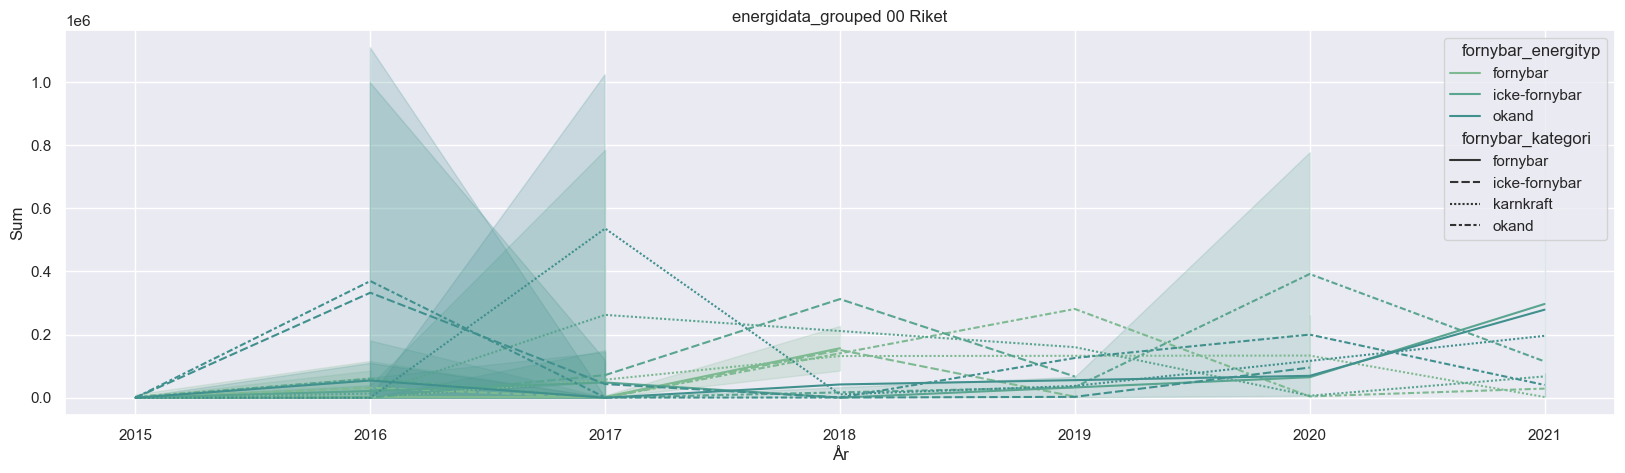

01 Stockholms l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


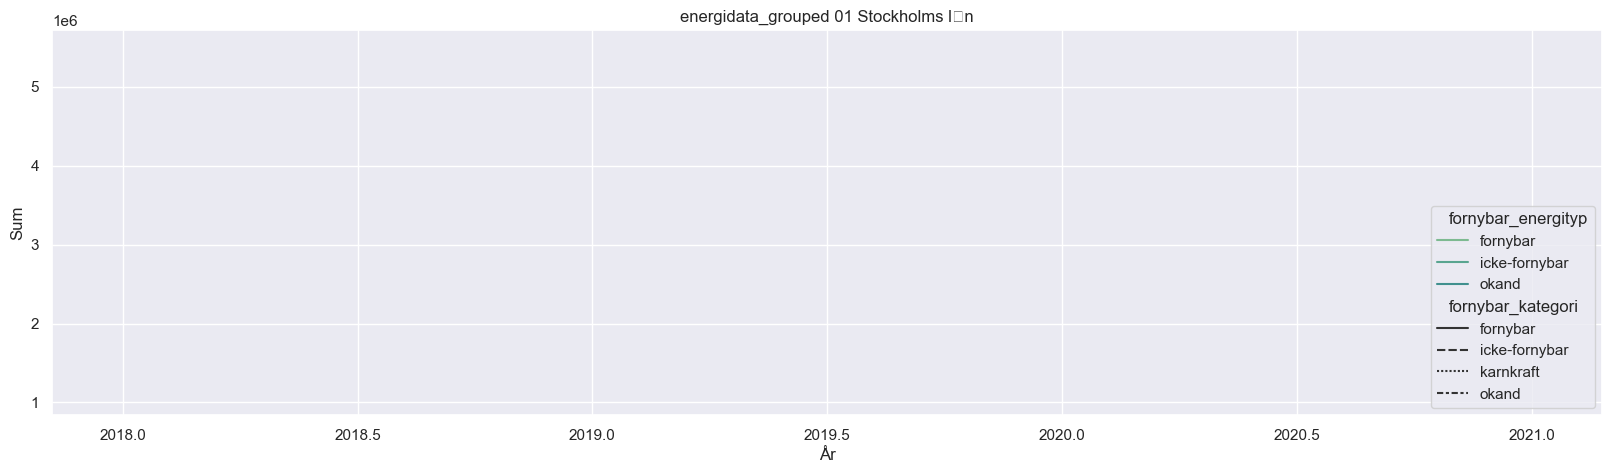

0117 �ster�ker


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


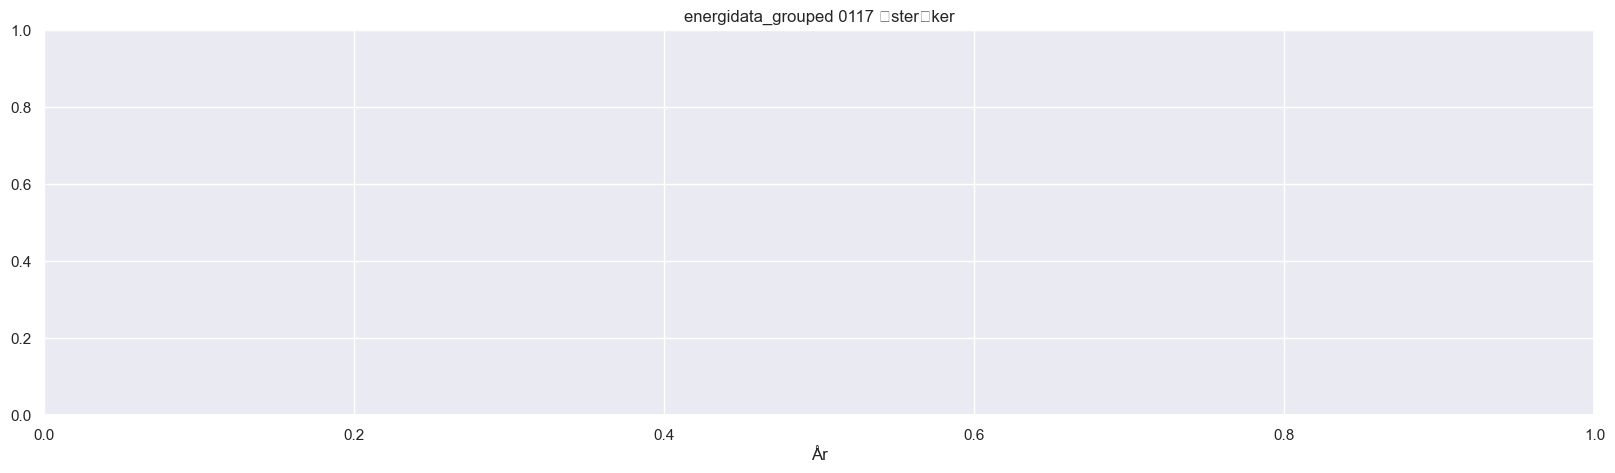

0160 T�by


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


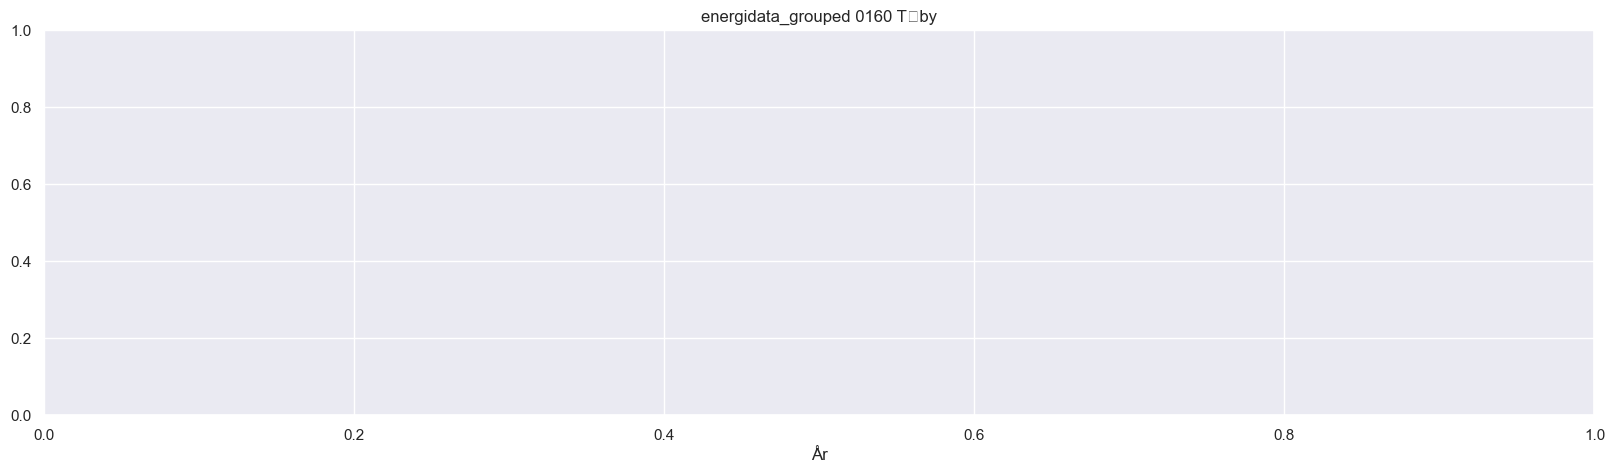

0180 Stockholm


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)


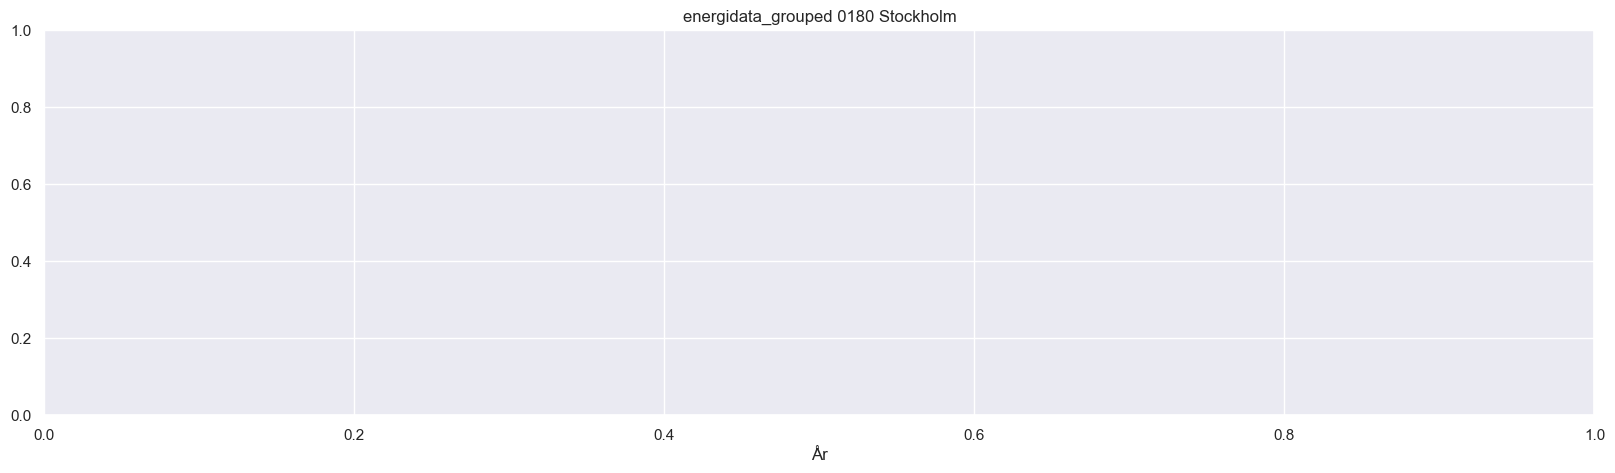

09 Gotlands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


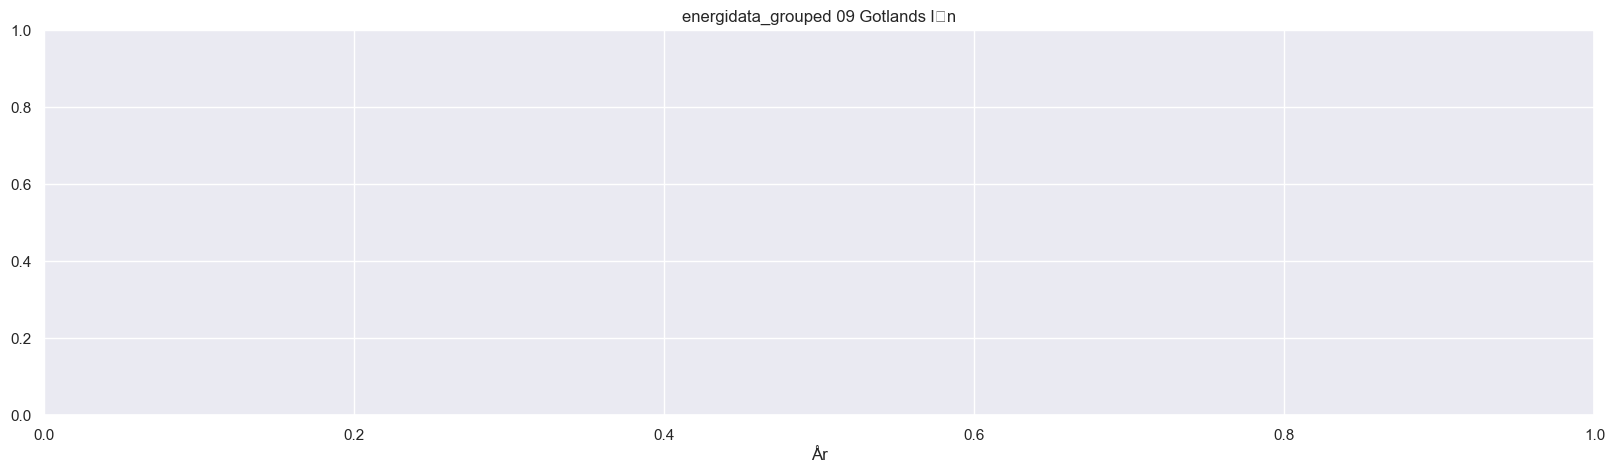

0980 Gotland


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)


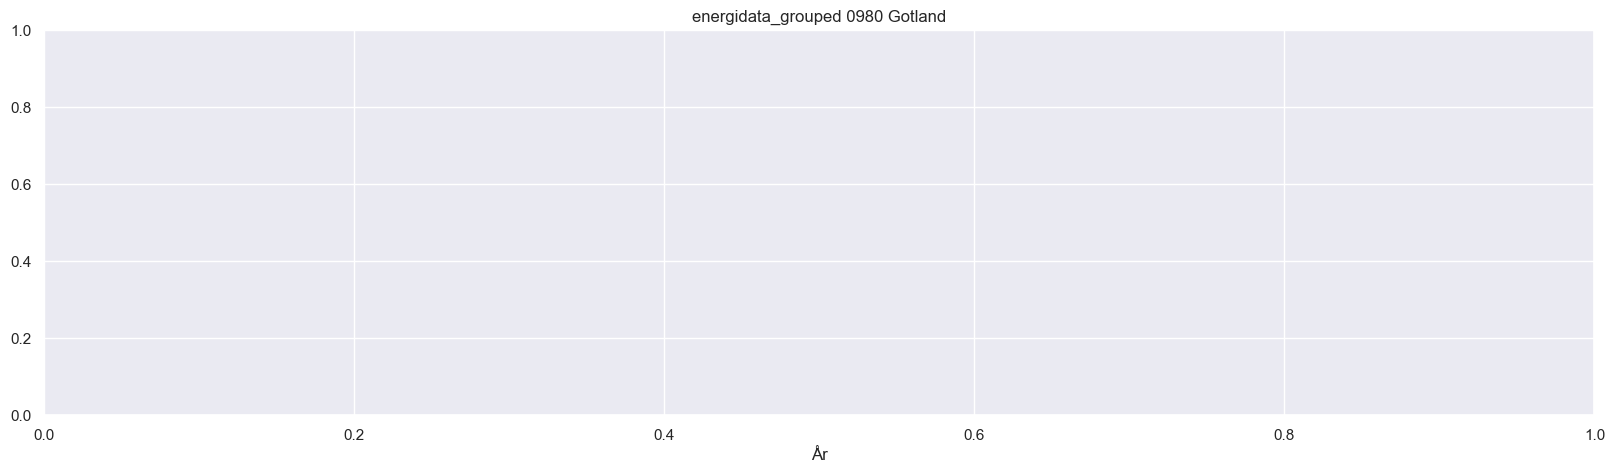

1480 G�teborg


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


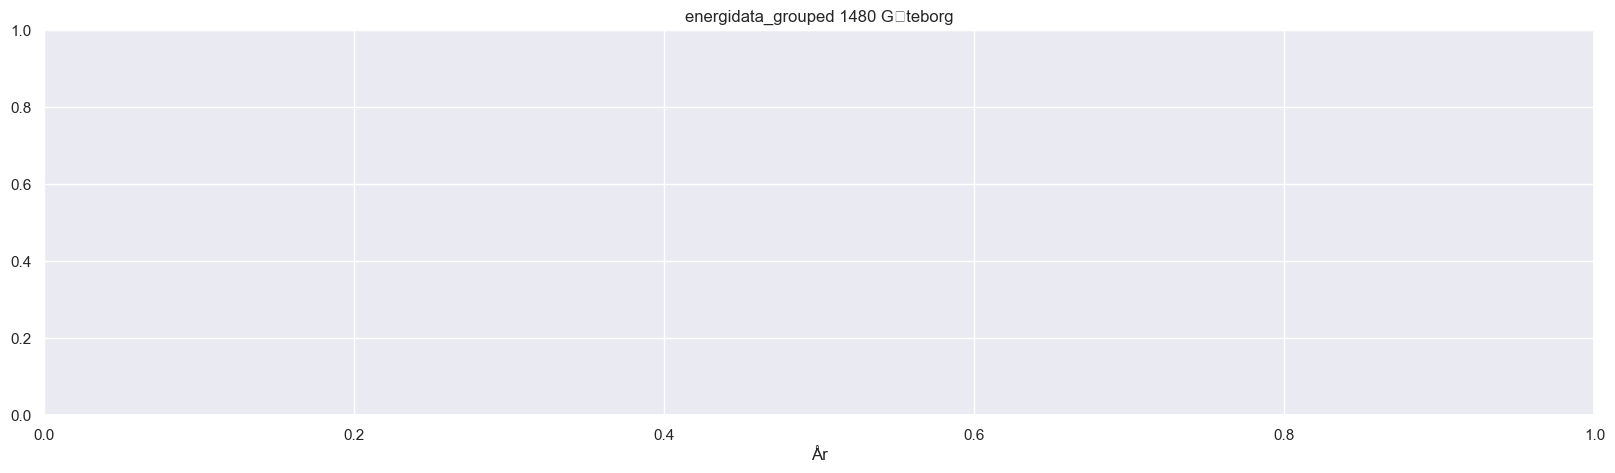

22 V�sternorrlands l�n


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


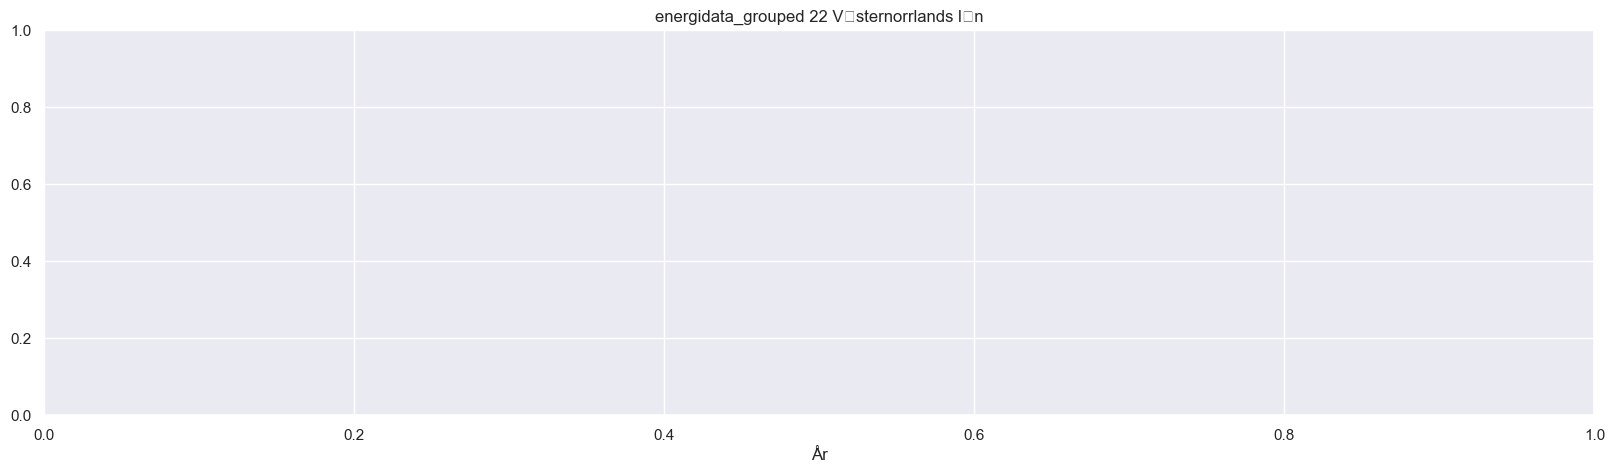

2581 Pite�


C:\Users\markella.nikolopoulo\AppData\Local\Temp\ipykernel_16144\1248712816.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)
C:\Users\markella.nikolopoulo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


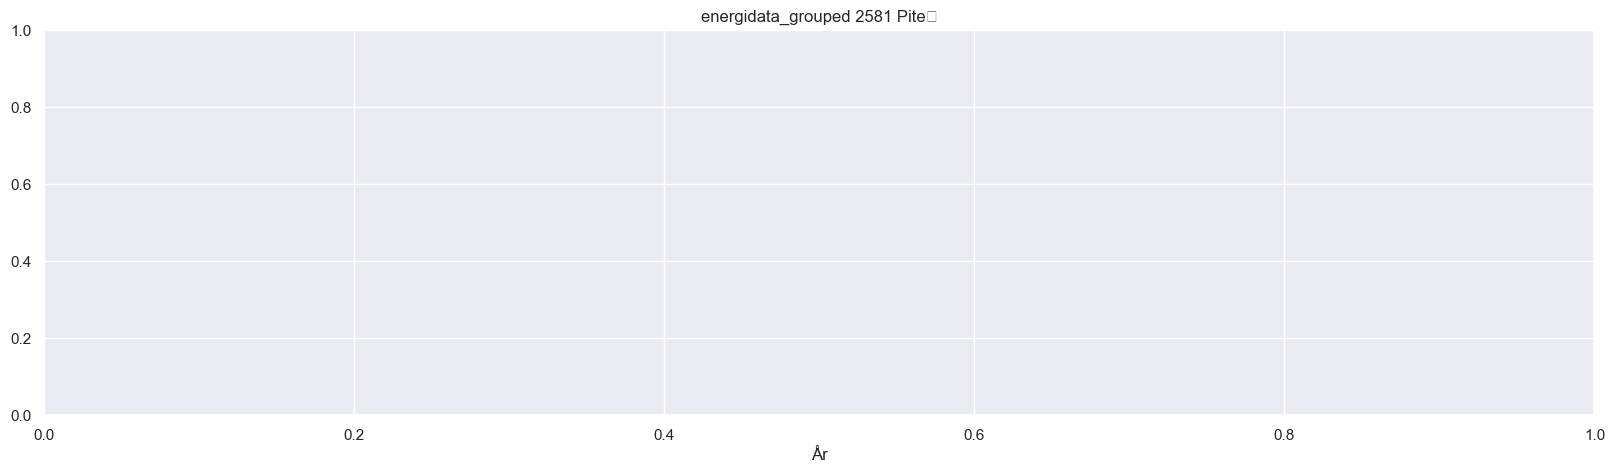

In [13]:
energidata = energidata.replace('..', 0)

energidata.MWh = energidata.MWh.astype(float)


energidata_grouped = energidata.groupby(['region', 'ar', 'fornybar_energityp', 'fornybar_kategori'], as_index=False
                                                ).agg(
                                                Mean=('MWh', np.mean),
                                                Sum=('MWh', np.sum),
                                                Avg=('MWh', np.average),
                                                Count=('MWh', 'count'),
                                                Max=('MWh', np.max),
                                                Min=('MWh', np.min)
).sort_values(by=['Mean', 'Sum', 'Avg', 'Max', 'Min'])

# energidata_grouped



# energidata_grouped.region.tail(50).drop_duplicates(
#     keep='first').reset_index(drop=True)

# # '03 Uppsala l�n', '0382 �sthammar', '13 Hallands l�n', '1383 Varberg', '08 Kalmar l�n', '0882 Oskarshamn', '00 Riket'


# energidata_grouped = energidata_grouped[energidata_grouped.region.isin([
#     '03 Uppsala l�n', '0382 �sthammar', '13 Hallands l�n', '1383 Varberg', '08 Kalmar l�n', '0882 Oskarshamn', '00 Riket'])].reset_index(drop=True)


# energidata_grouped



for region in energidata_grouped.region.drop_duplicates(keep='first').reset_index(drop=True):

    print(region)
    fig, ax = plt.subplots(figsize=(20, 5))
    data = leveranser_flytande_group[energidata_grouped.region == region].reset_index(drop=True)
    fig = sns.lineplot(data=data,
                       x=data.ar.astype(int),
                       y='Sum',
                       hue=energidata_grouped.fornybar_energityp,
                       style=energidata_grouped.fornybar_kategori)
    fig.set_title('energidata_grouped ' + region)
    fig.set_xlabel('År')
    # fig.set_ylabel('Sum av bransletyp')

    plt.show(fig)
